# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
# get the current directory
cwd = os.getcwd()


# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: /Users/masha/Documents/Uni/Thesis/neurolib


In [2]:
from neurolib.models.wc import WCModel
# Some useful functions are provided here
import neurolib.utils.functions as func
import neurolib.utils.stimulus as stim
import numpy as np
import scipy

In [3]:
import math

In [4]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [15]:
wc = WCModel()
wc.params['duration'] = 2.0*1000

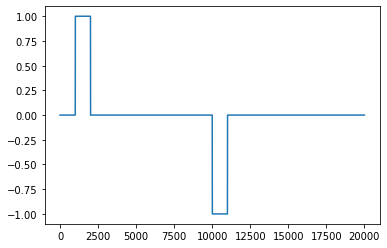

In [6]:
stimulus = np.zeros((1,20000))
stimulus[0][1000:2000] = 1
stimulus[0][10000:11000] = -1
plt.plot(stimulus.T)



In [16]:
stimulus = stim.StepInput(step_size=0.001,  start=5, end=100, n=1).to_model(wc)


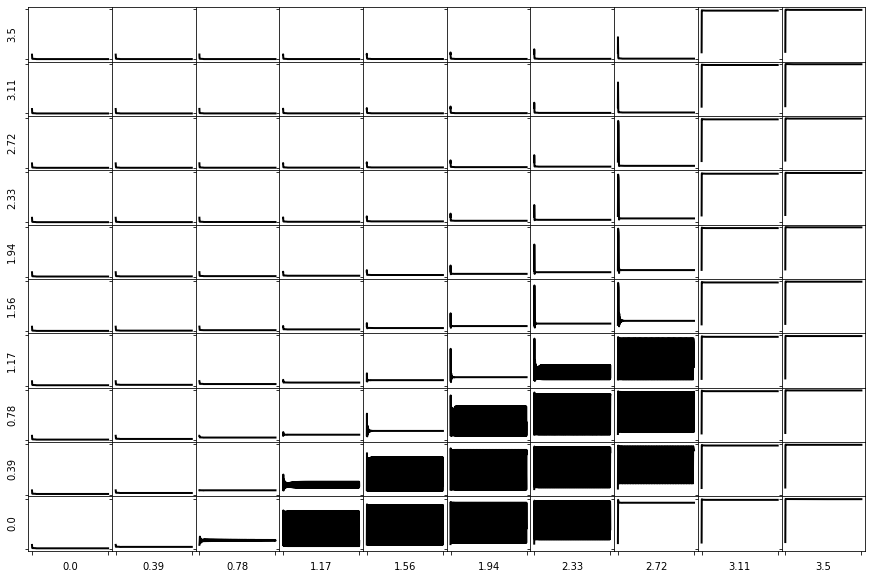

In [17]:
max_exc = []
min_exc = []
ex = []
wc = WCModel()
wc.params['duration'] = 2.0*1000
#wc.params["control_term_E"] = stimulus
# these are the different input values that we want to scan
exc_inputs_n = 10
inh_inputs_n = 10
exc_inputs = np.linspace(0, 3.5, exc_inputs_n)
inh_inputs = np.linspace(0, 3.5, inh_inputs_n)
fig,a =  plt.subplots(inh_inputs_n,exc_inputs_n,  sharex='col', sharey='row', figsize=(15,10))
for i, inh_ext in enumerate(inh_inputs):
    for j, exc_ext in enumerate(exc_inputs):
        # Note: this has to be a vector since it is input for all nodes
        # (but we have only one node in this example)
        wc.params['exc_ext'] = exc_ext
        wc.params['inh_ext'] = inh_ext
        wc.params["control_term_E"] = stimulus
        wc.params["control_term_I"] = stimulus
        wc.run()
        # we add the maximum and the minimum of the last second of the 
        # simulation to a list
        max_exc.append(np.max(wc.exc[0, -int(1000/wc.params['dt']):]))
        min_exc.append(np.min(wc.exc[0, -int(1000/wc.params['dt']):]))
        #print(np.shape(wc.exc))
        ex = wc.exc


        #plt.figure(figsize = (20, 6))
        #plt.plot(range(int(wc.params['duration']/wc.params['dt'])), ex[0].tolist(), c='k', lw = 2)
        #plt.show()
        
        
        #fig, ax = plt.subplots(50, 50, sharex='col', sharey='row')

        #ax[i, j].plot(range(int(wc.params['duration']/wc.params['dt'])), ex[0].tolist(), c='k', lw = 2)
        
        
        
        a[inh_inputs_n-i-1][j].plot(range(int(wc.params['duration']/wc.params['dt'])), ex[0].tolist(), c='k', lw = 2)
        #a[9-i][j].plot(s)

        # Turn off tick labels
        a[inh_inputs_n-i-1][j].set_yticklabels([])
        a[inh_inputs_n-i-1][j].set_xticklabels([])
        
        if(i==0):
            a[inh_inputs_n-i-1][j].set_xlabel(round(exc_ext, 2))
        if(j==0):
            a[inh_inputs_n-i-1][j].set_ylabel(round(inh_ext, 2))
       

        #plt.show()

        #ex = wc.inh
        #plt.plot(range(int(wc.params['duration']/wc.params['dt'])), ex[0].tolist(), c='k', lw = 2)
        #plt.show()

        #print(np.shape(wc.bracets))
        #plt.plot(wc.params['duration']/wc.params['dt'], wc.exc[0], c='k', lw = 2)
        #plt.show()

plt.subplots_adjust(hspace=.0)
plt.subplots_adjust(wspace=.0)
#fig.tight_layout()
plt.show()

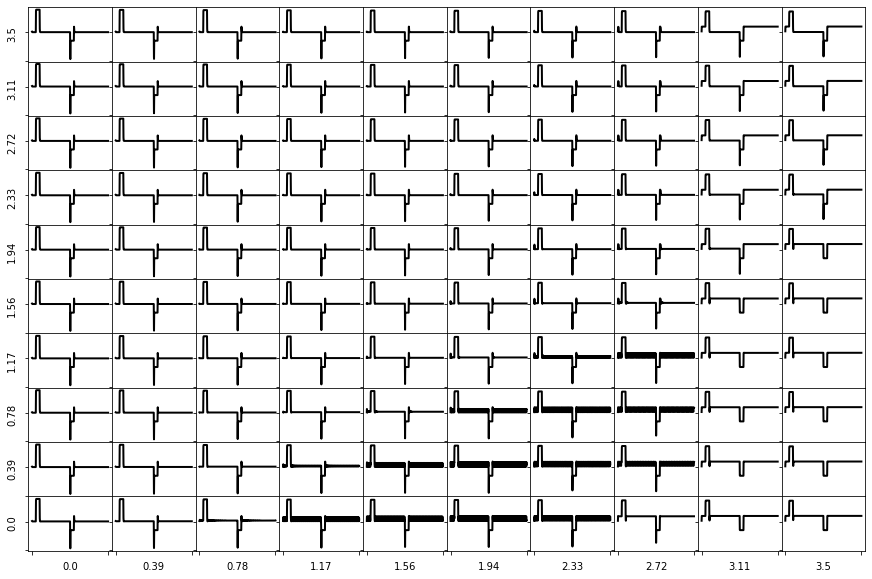

In [127]:
fig

exc_ext =  0.0
inh_ext =  0.0
exc_5000 0.011225367461896835
exc_19999 0.011225367461896835
inh_5000 0.013126741089502545
inh_19999 0.013126741089502545


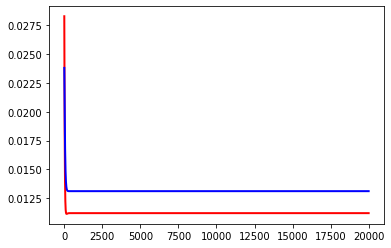

exc_ext =  0.3888888888888889
inh_ext =  0.0
exc_5000 0.025318284949723702
exc_19999 0.025318284949723702
inh_5000 0.017513166586913476
inh_19999 0.017513166586913476


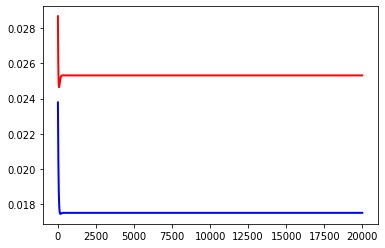

exc_ext =  0.7777777777777778
inh_ext =  0.0
exc_5000 0.08558333354191809
exc_19999 0.08607676384117226
inh_5000 0.05104343103675603
inh_19999 0.054828791844417774


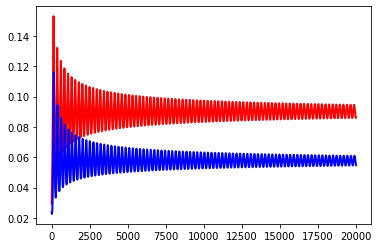

exc_ext =  1.1666666666666667
inh_ext =  0.0
exc_5000 0.1357467750398451
exc_19999 0.0800937761596028
inh_5000 0.2831470599960266
inh_19999 0.04170299568873565


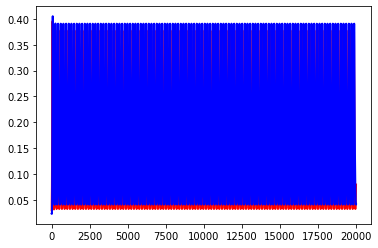

exc_ext =  1.5555555555555556
inh_ext =  0.0
exc_5000 0.04773287980436292
exc_19999 0.43378602092839746
inh_5000 0.12653553194058068
inh_19999 0.38405957700862275


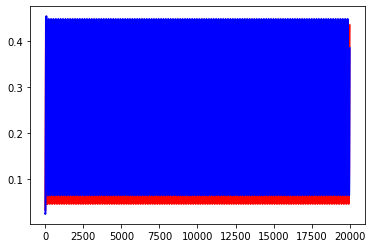

exc_ext =  1.9444444444444444
inh_ext =  0.0
exc_5000 0.06554435167344293
exc_19999 0.20135959050312355
inh_5000 0.14566501690777706
inh_19999 0.3864918135762622


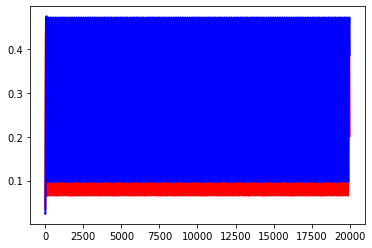

exc_ext =  2.3333333333333335
inh_ext =  0.0
exc_5000 0.4268400978340411
exc_19999 0.19394657390170694
inh_5000 0.3435156853123105
inh_19999 0.3736701228737835


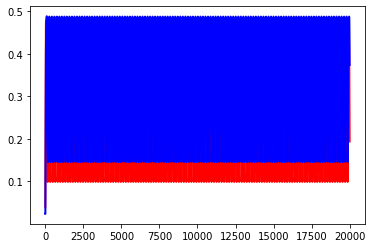

exc_ext =  2.7222222222222223
inh_ext =  0.0
exc_5000 0.4584819838005554
exc_19999 0.4584819838005554
inh_5000 0.49323636590468567
inh_19999 0.49323636590468567


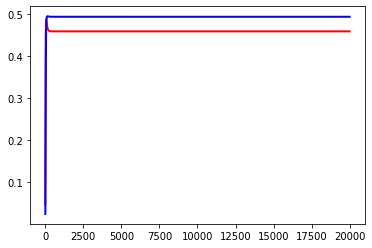

exc_ext =  3.111111111111111
inh_ext =  0.0
exc_5000 0.4868194564235943
exc_19999 0.4868194564235943
inh_5000 0.496351624656613
inh_19999 0.496351624656613


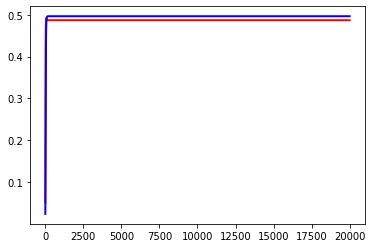

exc_ext =  3.5
inh_ext =  0.0
exc_5000 0.4936050484030017
exc_19999 0.4936050484030017
inh_5000 0.496857861560683
inh_19999 0.496857861560683


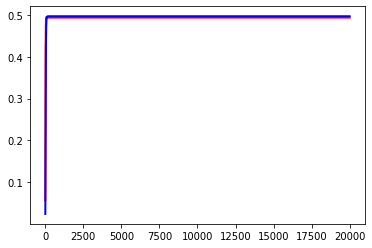

exc_ext =  0.0
inh_ext =  0.3888888888888889
exc_5000 0.00927865666325521
exc_19999 0.00927865666325521
inh_5000 0.021333033228678376
inh_19999 0.021333033228678376


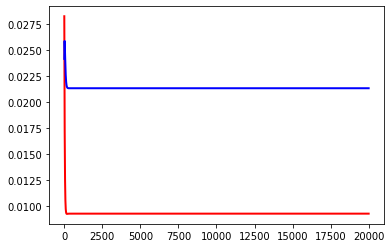

exc_ext =  0.3888888888888889
inh_ext =  0.3888888888888889
exc_5000 0.018996261271055585
exc_19999 0.018996261271055585
inh_5000 0.025779091261297408
inh_19999 0.025779091261297408


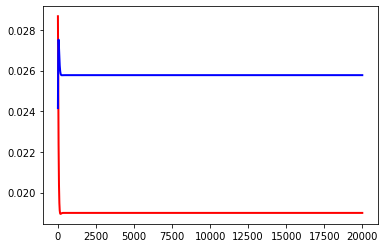

exc_ext =  0.7777777777777778
inh_ext =  0.3888888888888889
exc_5000 0.04528108849794771
exc_19999 0.04528108849794771
inh_5000 0.041852774968629575
inh_19999 0.041852774968629575


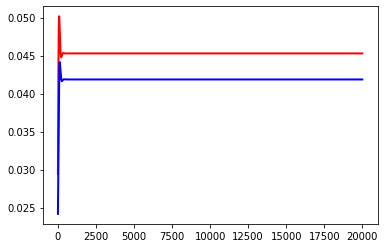

exc_ext =  1.1666666666666667
inh_ext =  0.3888888888888889
exc_5000 0.11579318453358864
exc_19999 0.10877578045690503
inh_5000 0.12619333571189018
inh_19999 0.1238633656548641


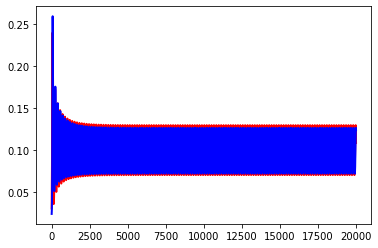

exc_ext =  1.5555555555555556
inh_ext =  0.3888888888888889
exc_5000 0.35258139921765685
exc_19999 0.13098091332380365
inh_5000 0.3947899316190531
inh_19999 0.30620977275435973


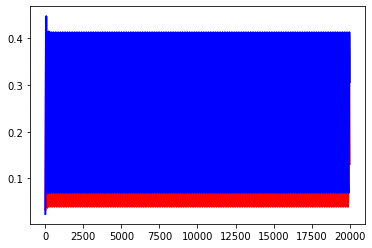

exc_ext =  1.9444444444444444
inh_ext =  0.3888888888888889
exc_5000 0.19029869537408436
exc_19999 0.4067992025764464
inh_5000 0.117500380040309
inh_19999 0.4666817625571386


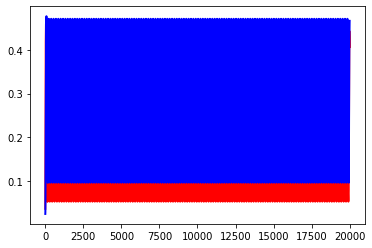

exc_ext =  2.3333333333333335
inh_ext =  0.3888888888888889
exc_5000 0.46530340639885703
exc_19999 0.4178659611159992
inh_5000 0.4723877721205703
inh_19999 0.48959695310233015


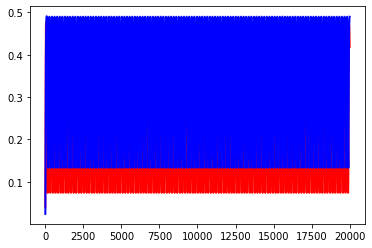

exc_ext =  2.7222222222222223
inh_ext =  0.3888888888888889
exc_5000 0.2664682855319289
exc_19999 0.44530637597989997
inh_5000 0.4536082691032317
inh_19999 0.4951623100752777


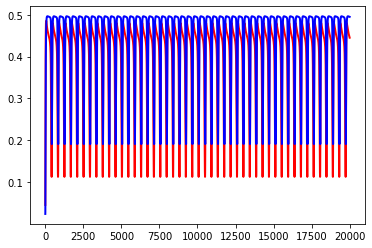

exc_ext =  3.111111111111111
inh_ext =  0.3888888888888889
exc_5000 0.48628151195618907
exc_19999 0.48628151195618907
inh_5000 0.4979181583666379
inh_19999 0.4979181583666379


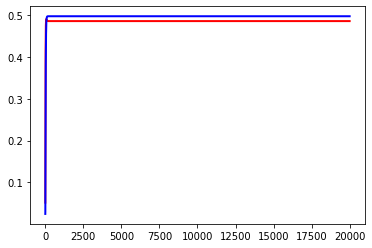

exc_ext =  3.5
inh_ext =  0.3888888888888889
exc_5000 0.49341906290945015
exc_19999 0.49341906290945015
inh_5000 0.49822350007781296
inh_19999 0.49822350007781296


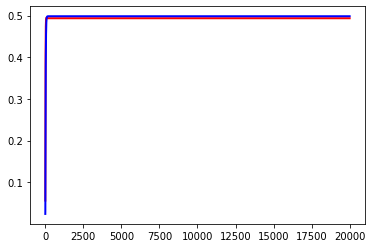

exc_ext =  0.0
inh_ext =  0.7777777777777778
exc_5000 0.007096243551800246
exc_19999 0.007096243551800246
inh_5000 0.033566966320910475
inh_19999 0.033566966320910475


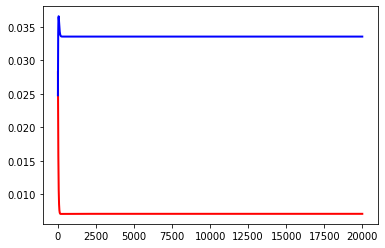

exc_ext =  0.3888888888888889
inh_ext =  0.7777777777777778
exc_5000 0.013596345348427843
exc_19999 0.013596345348427843
inh_5000 0.0377794785725304
inh_19999 0.0377794785725304


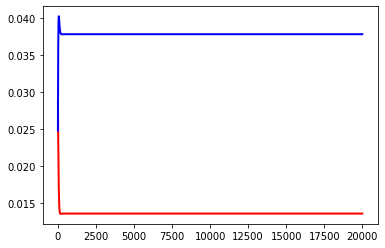

exc_ext =  0.7777777777777778
inh_ext =  0.7777777777777778
exc_5000 0.02737589021600102
exc_19999 0.02737589021600102
inh_5000 0.048081826897184876
inh_19999 0.048081826897184876


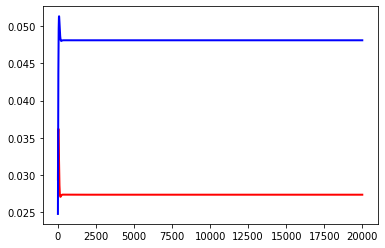

exc_ext =  1.1666666666666667
inh_ext =  0.7777777777777778
exc_5000 0.05554010686353905
exc_19999 0.05554010686353905
inh_5000 0.07532578672468779
inh_19999 0.07532578672468779


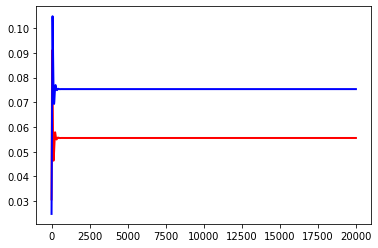

exc_ext =  1.5555555555555556
inh_ext =  0.7777777777777778
exc_5000 0.09289937685952218
exc_19999 0.09289961847425011
inh_5000 0.12408943167173579
inh_19999 0.12408953394417964


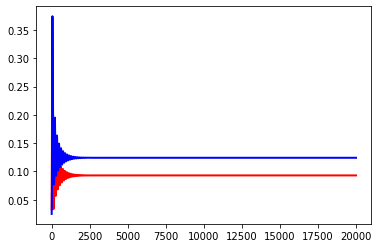

exc_ext =  1.9444444444444444
inh_ext =  0.7777777777777778
exc_5000 0.046210449527885035
exc_19999 0.04868345133891739
inh_5000 0.1451527823674627
inh_19999 0.11988804104134052


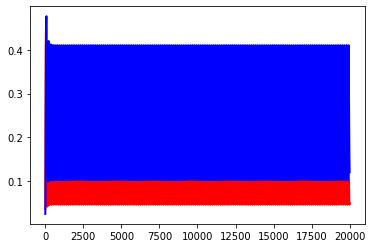

exc_ext =  2.3333333333333335
inh_ext =  0.7777777777777778
exc_5000 0.0715115363113366
exc_19999 0.45465253865766797
inh_5000 0.23454272122830938
inh_19999 0.4709979931685509


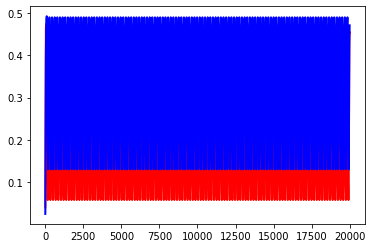

exc_ext =  2.7222222222222223
inh_ext =  0.7777777777777778
exc_5000 0.3786360410911514
exc_19999 0.47718577634812076
inh_5000 0.49345682794542184
inh_19999 0.47222172072063984


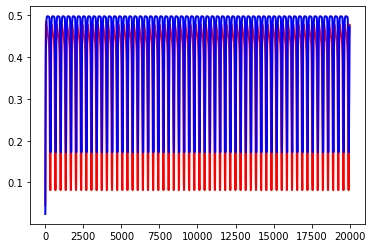

exc_ext =  3.111111111111111
inh_ext =  0.7777777777777778
exc_5000 0.48595649118693385
exc_19999 0.48595649118693385
inh_5000 0.49882282349785323
inh_19999 0.49882282349785323


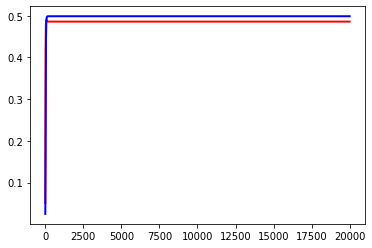

exc_ext =  3.5
inh_ext =  0.7777777777777778
exc_5000 0.4933103294157174
exc_19999 0.4933103294157174
inh_5000 0.49900118177818575
inh_19999 0.49900118177818575


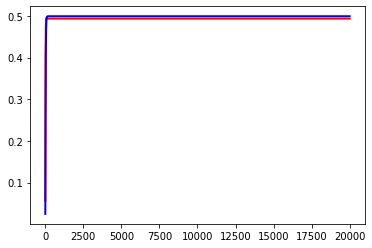

exc_ext =  0.0
inh_ext =  1.1666666666666667
exc_5000 0.004945235101082743
exc_19999 0.004945235101082743
inh_5000 0.05100426158100721
inh_19999 0.05100426158100721


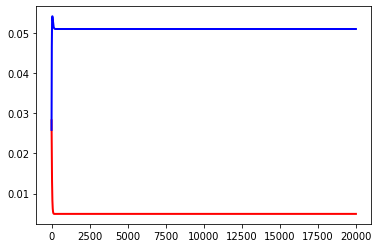

exc_ext =  0.3888888888888889
inh_ext =  1.1666666666666667
exc_5000 0.009092609161317494
exc_19999 0.009092609161317494
inh_5000 0.05463870705309079
inh_19999 0.05463870705309079


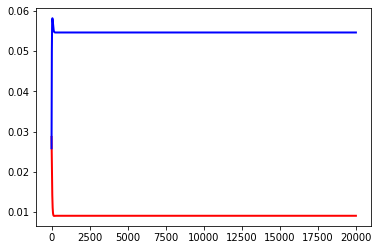

exc_ext =  0.7777777777777778
inh_ext =  1.1666666666666667
exc_5000 0.016949807796283845
exc_19999 0.016949807796283845
inh_5000 0.06202629477150474
inh_19999 0.06202629477150474


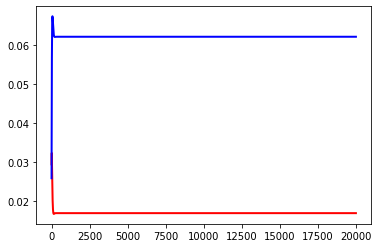

exc_ext =  1.1666666666666667
inh_ext =  1.1666666666666667
exc_5000 0.03165026485295291
exc_19999 0.03165026485295291
inh_5000 0.0776234630248147
inh_19999 0.0776234630248147


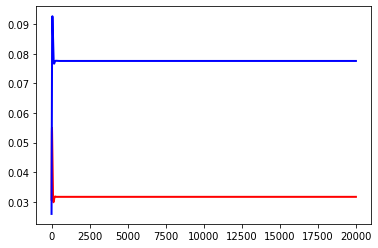

exc_ext =  1.5555555555555556
inh_ext =  1.1666666666666667
exc_5000 0.055525204339740786
exc_19999 0.055525204339740786
inh_5000 0.10773009548909157
inh_19999 0.10773009548909157


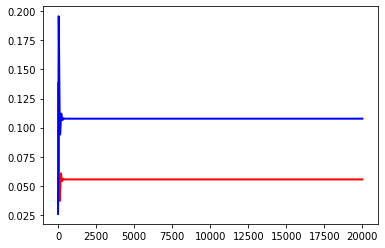

exc_ext =  1.9444444444444444
inh_ext =  1.1666666666666667
exc_5000 0.08497296677782926
exc_19999 0.08497296677782926
inh_5000 0.15195419668335658
inh_19999 0.15195419668335658


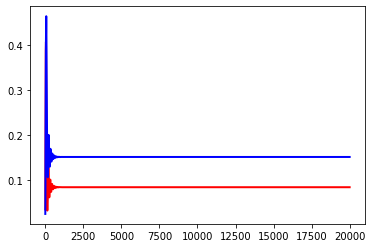

exc_ext =  2.3333333333333335
inh_ext =  1.1666666666666667
exc_5000 0.19486088092369747
exc_19999 0.20089234991733368
inh_5000 0.30415451567936536
inh_19999 0.2569154653733708


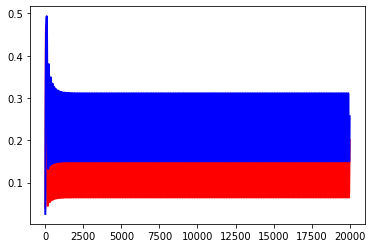

exc_ext =  2.7222222222222223
inh_ext =  1.1666666666666667
exc_5000 0.41963282232760374
exc_19999 0.2466469109619698
inh_5000 0.49783172321645736
inh_19999 0.47671248590729826


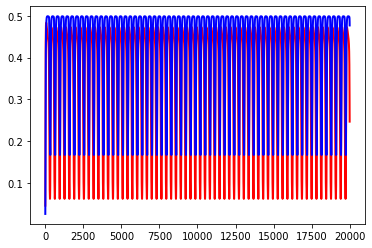

exc_ext =  3.111111111111111
inh_ext =  1.1666666666666667
exc_5000 0.48576639609778366
exc_19999 0.48576639609778366
inh_5000 0.49933806403359793
inh_19999 0.49933806403359793


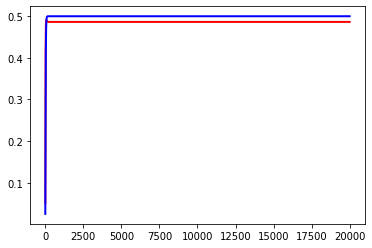

exc_ext =  3.5
inh_ext =  1.1666666666666667
exc_5000 0.4932480112170603
exc_19999 0.4932480112170603
inh_5000 0.49944024627058337
inh_19999 0.49944024627058337


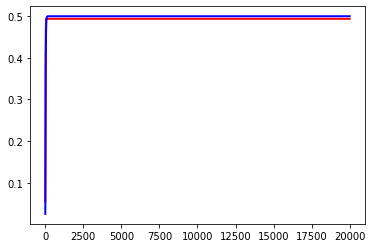

exc_ext =  0.0
inh_ext =  1.5555555555555556
exc_5000 0.0031014716303472
exc_19999 0.0031014716303472
inh_5000 0.07467175657528383
inh_19999 0.07467175657528383


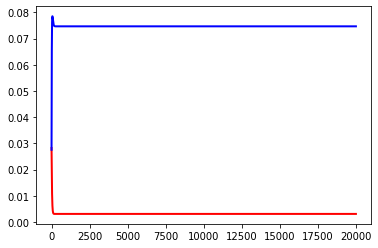

exc_ext =  0.3888888888888889
inh_ext =  1.5555555555555556
exc_5000 0.005581871920489447
exc_19999 0.005581871920489447
inh_5000 0.07746126791811964
inh_19999 0.07746126791811964


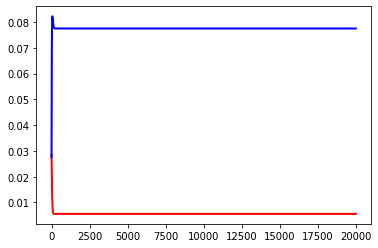

exc_ext =  0.7777777777777778
inh_ext =  1.5555555555555556
exc_5000 0.01005053804774141
exc_19999 0.01005053804774141
inh_5000 0.08265015761801285
inh_19999 0.08265015761801285


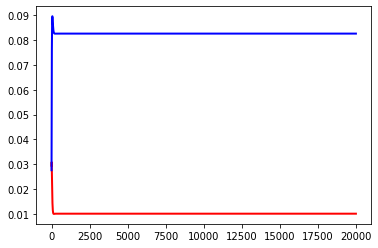

exc_ext =  1.1666666666666667
inh_ext =  1.5555555555555556
exc_5000 0.017994358726032552
exc_19999 0.017994358726032552
inh_5000 0.09238385017717823
inh_19999 0.09238385017717823


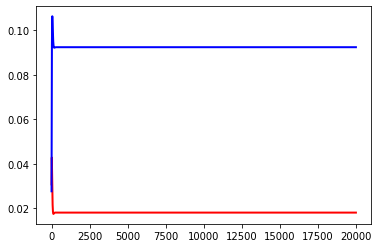

exc_ext =  1.5555555555555556
inh_ext =  1.5555555555555556
exc_5000 0.031370265221999136
exc_19999 0.031370265221999136
inh_5000 0.11018441005418324
inh_19999 0.11018441005418324


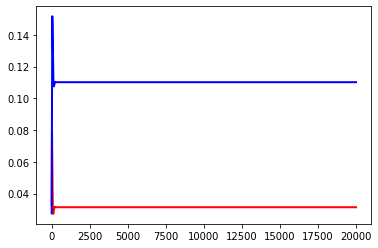

exc_ext =  1.9444444444444444
inh_ext =  1.5555555555555556
exc_5000 0.05113238981560788
exc_19999 0.05113238981560788
inh_5000 0.13940561356966644
inh_19999 0.13940561356966644


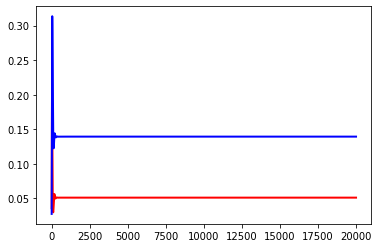

exc_ext =  2.3333333333333335
inh_ext =  1.5555555555555556
exc_5000 0.0757137707253584
exc_19999 0.0757137707253584
inh_5000 0.17965143993114915
inh_19999 0.17965143993114915


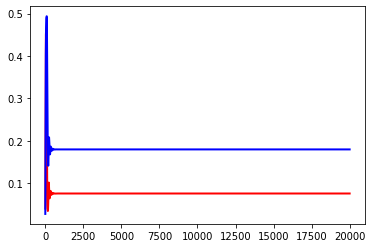

exc_ext =  2.7222222222222223
inh_ext =  1.5555555555555556
exc_5000 0.1030810430511294
exc_19999 0.10308104455613065
inh_5000 0.22770233585748673
inh_19999 0.22770234341361634


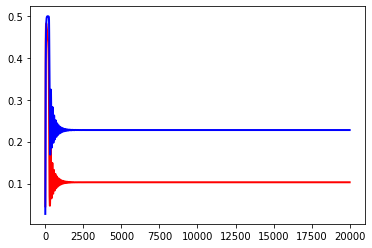

exc_ext =  3.111111111111111
inh_ext =  1.5555555555555556
exc_5000 0.485657399795881
exc_19999 0.485657399795881
inh_5000 0.4996290083161892
inh_19999 0.4996290083161892


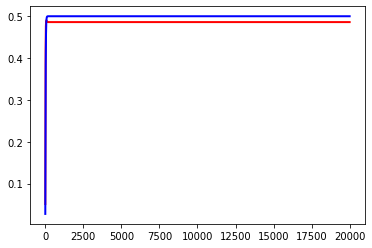

exc_ext =  3.5
inh_ext =  1.5555555555555556
exc_5000 0.49321270556570945
exc_19999 0.49321270556570945
inh_5000 0.49968688780935444
inh_19999 0.49968688780935444


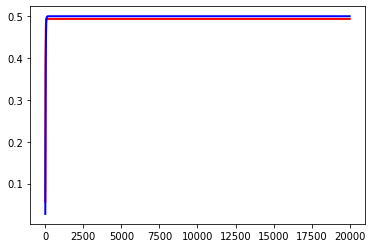

exc_ext =  0.0
inh_ext =  1.9444444444444444
exc_5000 0.0017410975363937762
exc_19999 0.0017410975363937762
inh_5000 0.10508542585620692
inh_19999 0.10508542585620692


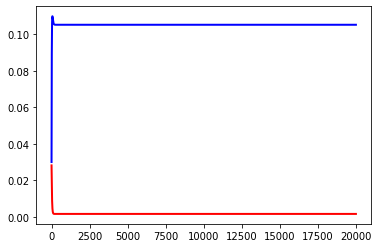

exc_ext =  0.3888888888888889
inh_ext =  1.9444444444444444
exc_5000 0.003108977771069711
exc_19999 0.003108977771069711
inh_5000 0.10695404056094066
inh_19999 0.10695404056094066


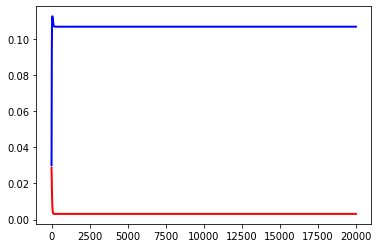

exc_ext =  0.7777777777777778
inh_ext =  1.9444444444444444
exc_5000 0.005531974615107696
exc_19999 0.005531974615107696
inh_5000 0.11030660563392182
inh_19999 0.11030660563392182


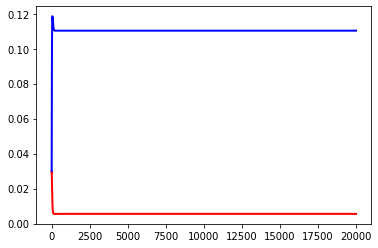

exc_ext =  1.1666666666666667
inh_ext =  1.9444444444444444
exc_5000 0.009768229531061112
exc_19999 0.009768229531061112
inh_5000 0.1162959852632895
inh_19999 0.1162959852632895


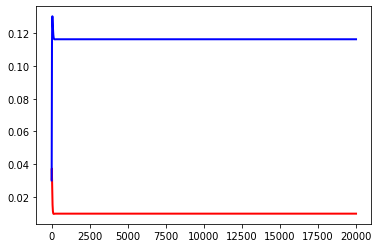

exc_ext =  1.5555555555555556
inh_ext =  1.9444444444444444
exc_5000 0.016959738297716617
exc_19999 0.016959738297716617
inh_5000 0.126820668949618
inh_19999 0.126820668949618


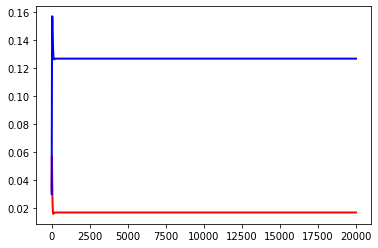

exc_ext =  1.9444444444444444
inh_ext =  1.9444444444444444
exc_5000 0.028439780598321713
exc_19999 0.028439780598321713
inh_5000 0.14447925021768382
inh_19999 0.14447925021768382


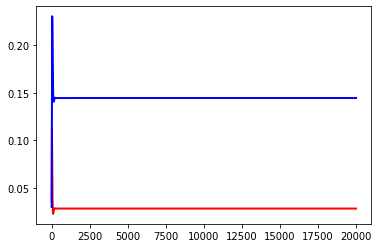

exc_ext =  2.3333333333333335
inh_ext =  1.9444444444444444
exc_5000 0.044970227902300736
exc_19999 0.044970227902300736
inh_5000 0.17148860175351585
inh_19999 0.17148860175351585


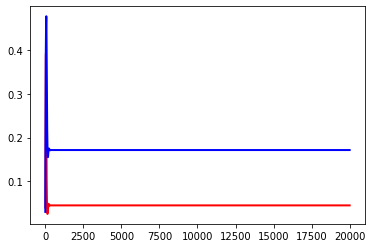

exc_ext =  2.7222222222222223
inh_ext =  1.9444444444444444
exc_5000 0.06610517475209683
exc_19999 0.06610517475209683
inh_5000 0.20803110244583037
inh_19999 0.20803110244583037


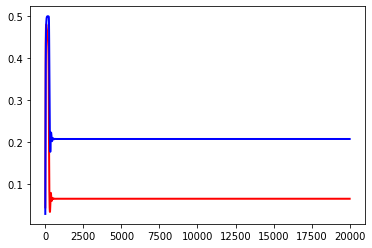

exc_ext =  3.111111111111111
inh_ext =  1.9444444444444444
exc_5000 0.48559562968370684
exc_19999 0.48559562968370684
inh_5000 0.49979246524902043
inh_19999 0.49979246524902043


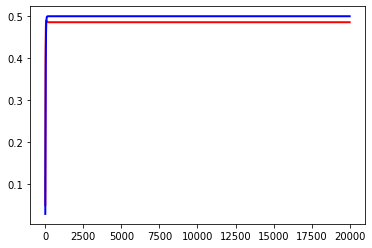

exc_ext =  3.5
inh_ext =  1.9444444444444444
exc_5000 0.493192835331289
exc_19999 0.493192835331289
inh_5000 0.4998250371937278
inh_19999 0.4998250371937278


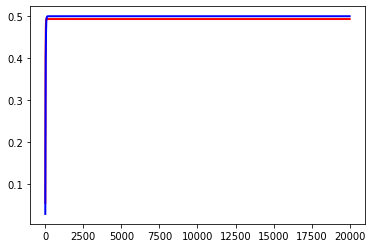

exc_ext =  0.0
inh_ext =  2.3333333333333335
exc_5000 0.0008805585909783793
exc_19999 0.0008805585909783793
inh_5000 0.14190693476692257
inh_19999 0.14190693476692257


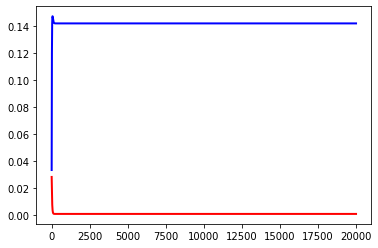

exc_ext =  0.3888888888888889
inh_ext =  2.3333333333333335
exc_5000 0.0015711198905318852
exc_19999 0.0015711198905318852
inh_5000 0.14299220175310481
inh_19999 0.14299220175310481


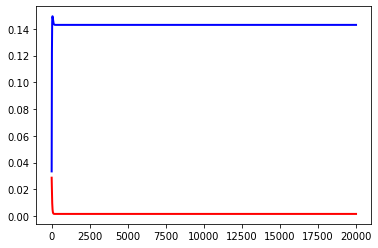

exc_ext =  0.7777777777777778
inh_ext =  2.3333333333333335
exc_5000 0.0027934448701615244
exc_19999 0.0027934448701615244
inh_5000 0.14492147294832808
inh_19999 0.14492147294832808


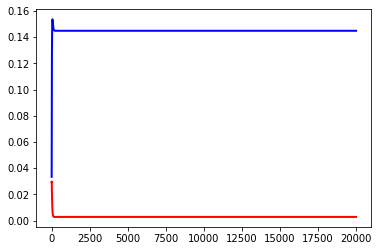

exc_ext =  1.1666666666666667
inh_ext =  2.3333333333333335
exc_5000 0.004935205976947777
exc_19999 0.004935205976947777
inh_5000 0.14832702027931147
inh_19999 0.14832702027931147


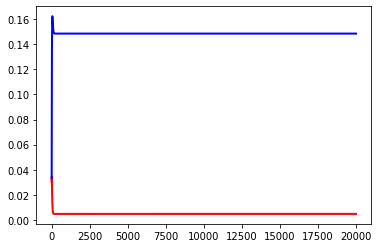

exc_ext =  1.5555555555555556
inh_ext =  2.3333333333333335
exc_5000 0.008618750113048069
exc_19999 0.008618750113048069
inh_5000 0.15425615243173996
inh_19999 0.15425615243173996


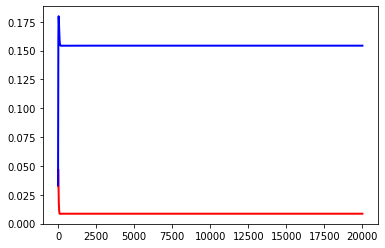

exc_ext =  1.9444444444444444
inh_ext =  2.3333333333333335
exc_5000 0.014744385427805899
exc_19999 0.014744385427805899
inh_5000 0.16430514047728767
inh_19999 0.16430514047728767


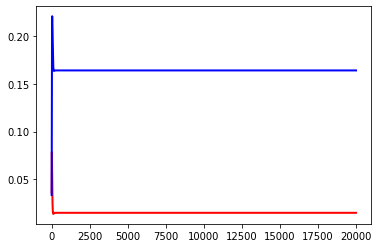

exc_ext =  2.3333333333333335
inh_ext =  2.3333333333333335
exc_5000 0.024369492346028237
exc_19999 0.024369492346028237
inh_5000 0.1805180149400234
inh_19999 0.1805180149400234


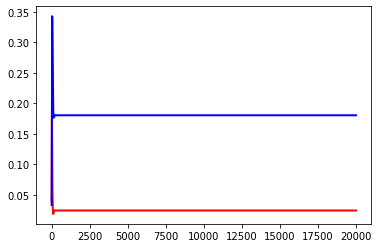

exc_ext =  2.7222222222222223
inh_ext =  2.3333333333333335
exc_5000 0.03830759387734057
exc_19999 0.03830759387734057
inh_5000 0.2047285276994499
inh_19999 0.2047285276994499


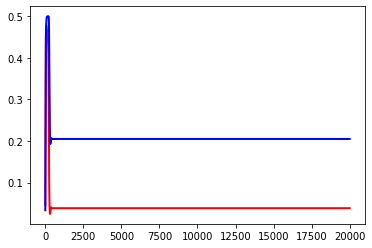

exc_ext =  3.111111111111111
inh_ext =  2.3333333333333335
exc_5000 0.4855608581186438
exc_19999 0.4855608581186438
inh_5000 0.49988402866498866
inh_19999 0.49988402866498866


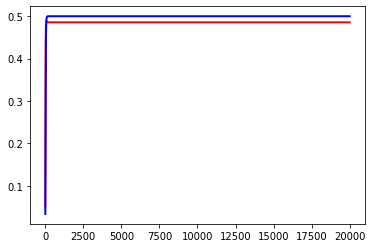

exc_ext =  3.5
inh_ext =  2.3333333333333335
exc_5000 0.49318169397906003
exc_19999 0.49318169397906003
inh_5000 0.4999022910701899
inh_19999 0.4999022910701899


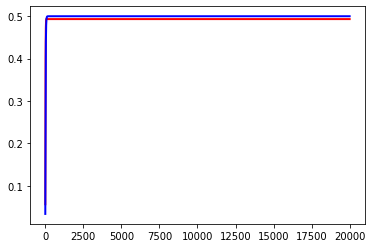

exc_ext =  0.0
inh_ext =  2.7222222222222223
exc_5000 0.0004093540913989751
exc_19999 0.0004093540913989751
inh_5000 0.18388530455614188
inh_19999 0.18388530455614188


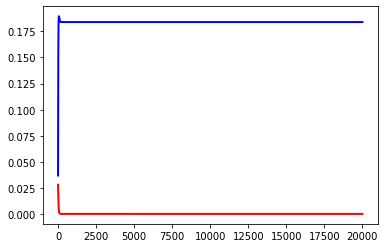

exc_ext =  0.3888888888888889
inh_ext =  2.7222222222222223
exc_5000 0.0007314569374801843
exc_19999 0.0007314569374801843
inh_5000 0.1844386957156378
inh_19999 0.1844386957156378


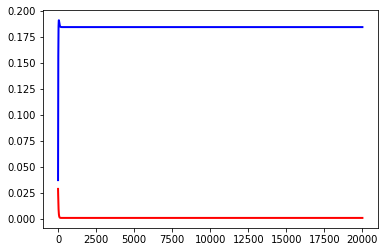

exc_ext =  0.7777777777777778
inh_ext =  2.7222222222222223
exc_5000 0.0013040612878079522
exc_19999 0.0013040612878079522
inh_5000 0.18542357914726806
inh_19999 0.18542357914726806


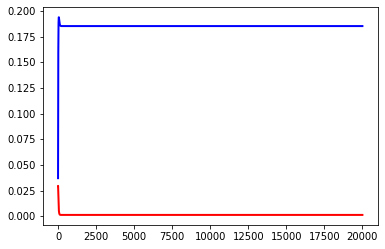

exc_ext =  1.1666666666666667
inh_ext =  2.7222222222222223
exc_5000 0.002315634712227428
exc_19999 0.002315634712227428
inh_5000 0.18716692563267592
inh_19999 0.18716692563267592


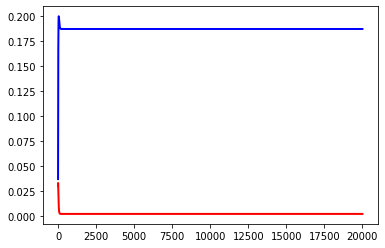

exc_ext =  1.5555555555555556
inh_ext =  2.7222222222222223
exc_5000 0.004083137321069912
exc_19999 0.004083137321069912
inh_5000 0.190223247918944
inh_19999 0.190223247918944


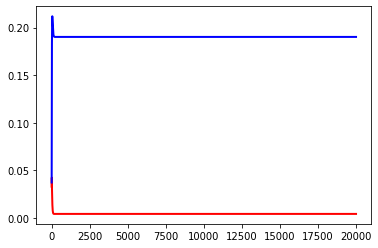

exc_ext =  1.9444444444444444
inh_ext =  2.7222222222222223
exc_5000 0.007113292971779853
exc_19999 0.007113292971779853
inh_5000 0.1954914966597741
inh_19999 0.1954914966597741


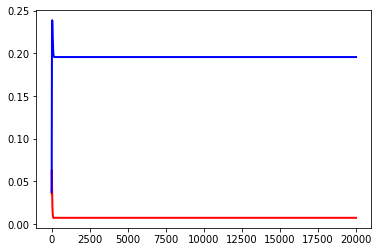

exc_ext =  2.3333333333333335
inh_ext =  2.7222222222222223
exc_5000 0.012146281649162106
exc_19999 0.012146281649162106
inh_5000 0.2043139143187384
inh_19999 0.2043139143187384


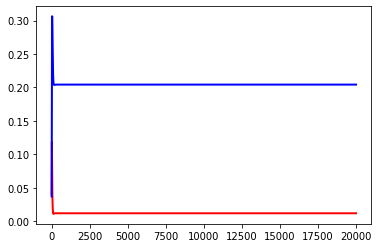

exc_ext =  2.7222222222222223
inh_ext =  2.7222222222222223
exc_5000 0.02010685099546253
exc_19999 0.02010685099546253
inh_5000 0.21841932267386344
inh_19999 0.21841932267386344


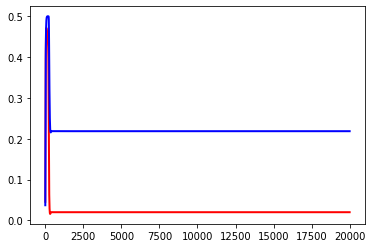

exc_ext =  3.111111111111111
inh_ext =  2.7222222222222223
exc_5000 0.4855413591731375
exc_19999 0.4855413591731375
inh_5000 0.49993523396630796
inh_19999 0.49993523396630796


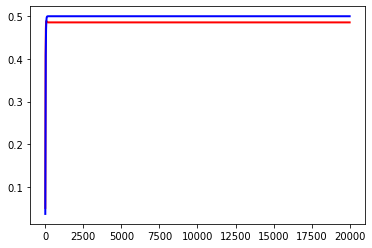

exc_ext =  3.5
inh_ext =  2.7222222222222223
exc_5000 0.4931754600813905
exc_19999 0.4931754600813905
inh_5000 0.4999454520329494
inh_19999 0.4999454520329494


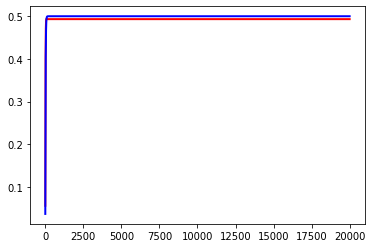

exc_ext =  0.0
inh_ext =  3.111111111111111
exc_5000 0.0001803578382921673
exc_19999 0.0001803578382921673
inh_5000 0.22914086096494574
inh_19999 0.22914086096494574


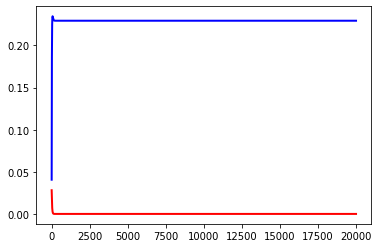

exc_ext =  0.3888888888888889
inh_ext =  3.111111111111111
exc_5000 0.0003227298969364783
exc_19999 0.0003227298969364783
inh_5000 0.22939599998004778
inh_19999 0.22939599998004778


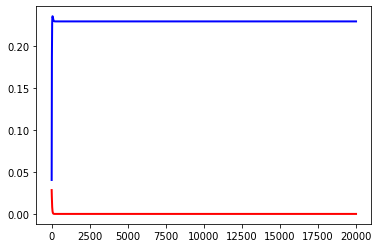

exc_ext =  0.7777777777777778
inh_ext =  3.111111111111111
exc_5000 0.0005768262543029863
exc_19999 0.0005768262543029863
inh_5000 0.22985142411958906
inh_19999 0.22985142411958906


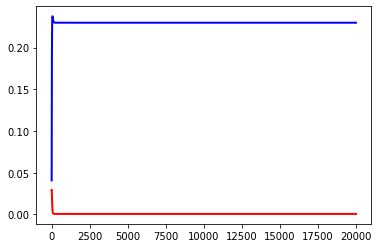

exc_ext =  1.1666666666666667
inh_ext =  3.111111111111111
exc_5000 0.0010288841883685654
exc_19999 0.0010288841883685654
inh_5000 0.2306618726800426
inh_19999 0.2306618726800426


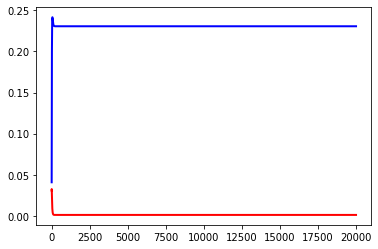

exc_ext =  1.5555555555555556
inh_ext =  3.111111111111111
exc_5000 0.001828650597941915
exc_19999 0.001828650597941915
inh_5000 0.23209632802834998
inh_19999 0.23209632802834998


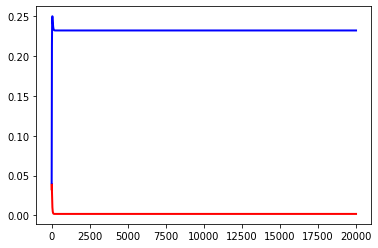

exc_ext =  1.9444444444444444
inh_ext =  3.111111111111111
exc_5000 0.0032299078329951184
exc_19999 0.0032299078329951184
inh_5000 0.23461140894013993
inh_19999 0.23461140894013993


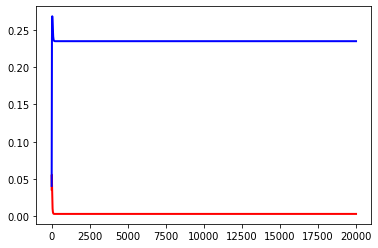

exc_ext =  2.3333333333333335
inh_ext =  3.111111111111111
exc_5000 0.0056449890554228525
exc_19999 0.0056449890554228525
inh_5000 0.2389506979901112
inh_19999 0.2389506979901112


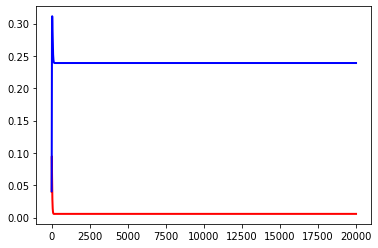

exc_ext =  2.7222222222222223
inh_ext =  3.111111111111111
exc_5000 0.00969785874864498
exc_19999 0.00969785874864498
inh_5000 0.24624143478648275
inh_19999 0.24624143478648275


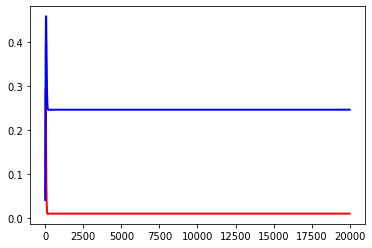

exc_ext =  3.111111111111111
inh_ext =  3.111111111111111
exc_5000 0.4855304482131049
exc_19999 0.4855304482131049
inh_5000 0.4999638426799108
inh_19999 0.4999638426799108


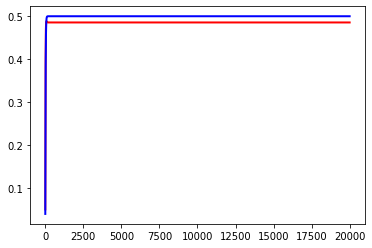

exc_ext =  3.5
inh_ext =  3.111111111111111
exc_5000 0.4931719761494404
exc_19999 0.4931719761494404
inh_5000 0.4999695531615699
inh_19999 0.4999695531615699


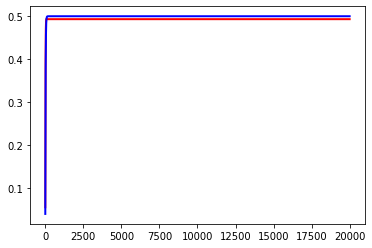

exc_ext =  0.0
inh_ext =  3.5
exc_5000 7.806923885818497e-05
exc_19999 7.806923885818497e-05
inh_5000 0.2755351088012482
inh_19999 0.2755351088012482


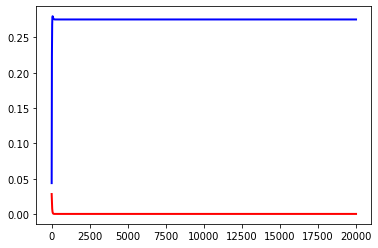

exc_ext =  0.3888888888888889
inh_ext =  3.5
exc_5000 0.00013981229246613934
exc_19999 0.00013981229246613934
inh_5000 0.2756454982085051
inh_19999 0.2756454982085051


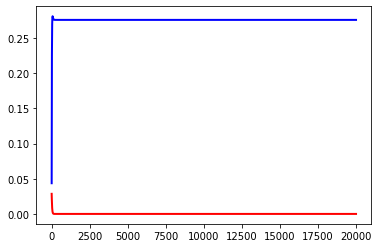

exc_ext =  0.7777777777777778
inh_ext =  3.5
exc_5000 0.00025026233347349866
exc_19999 0.00025026233347349866
inh_5000 0.2758429538373781
inh_19999 0.2758429538373781


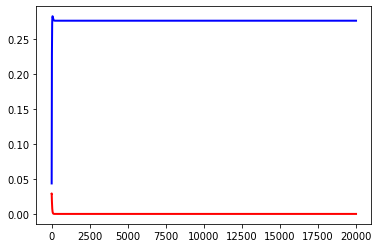

exc_ext =  1.1666666666666667
inh_ext =  3.5
exc_5000 0.0004475710255249837
exc_19999 0.0004475710255249837
inh_5000 0.2761956376816205
inh_19999 0.2761956376816205


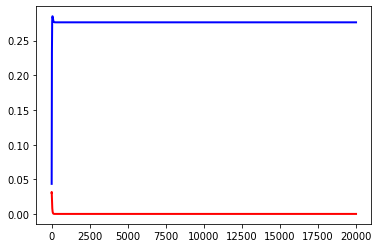

exc_ext =  1.5555555555555556
inh_ext =  3.5
exc_5000 0.0007991856131302868
exc_19999 0.0007991856131302868
inh_5000 0.2768239705802668
inh_19999 0.2768239705802668


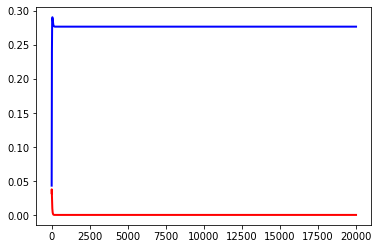

exc_ext =  1.9444444444444444
inh_ext =  3.5
exc_5000 0.0014230973199674817
exc_19999 0.0014230973199674817
inh_5000 0.2779383511724457
inh_19999 0.2779383511724457


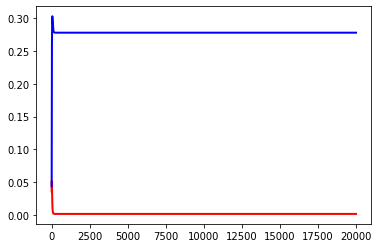

exc_ext =  2.3333333333333335
inh_ext =  3.5
exc_5000 0.0025219656096546277
exc_19999 0.0025219656096546277
inh_5000 0.279899286529263
inh_19999 0.279899286529263


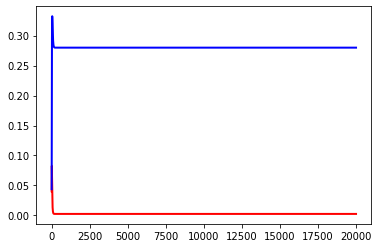

exc_ext =  2.7222222222222223
inh_ext =  3.5
exc_5000 0.0044331330664497
exc_19999 0.0044331330664497
inh_5000 0.28330396822211795
inh_19999 0.28330396822211795


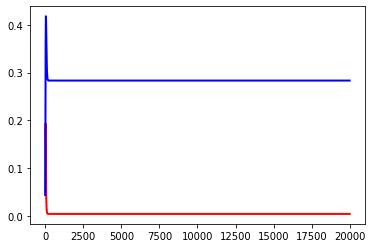

exc_ext =  3.111111111111111
inh_ext =  3.5
exc_5000 0.4855243501757583
exc_19999 0.4855243501757583
inh_5000 0.49997981808039327
inh_19999 0.49997981808039327


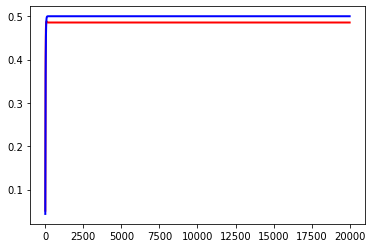

exc_ext =  3.5
inh_ext =  3.5
exc_5000 0.4931700303710192
exc_19999 0.4931700303710192
inh_5000 0.49998300736421963
inh_19999 0.49998300736421963


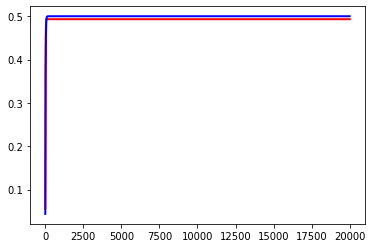

In [206]:
wc = WCModel()
wc.params['duration'] = 2.0*1000
exc_inputs_n = 10
inh_inputs_n = 10
exc_inputs = np.linspace(0, 3.5, exc_inputs_n)
inh_inputs = np.linspace(0, 3.5, inh_inputs_n)
#fig,a =  plt.subplots(10,25,  sharex='col', sharey='row', figsize=(15,10))
for i, inh_ext in enumerate(inh_inputs):
    for j, exc_ext in enumerate(exc_inputs):
        # Note: this has to be a vector since it is input for all nodes
        # (but we have only one node in this example)
        wc.params['exc_ext'] = exc_ext
        wc.params['inh_ext'] = inh_ext
        #wc.params['duration'] = 2.0*1000
        #wc.params['exc_ext'] = 2.9
        #wc.params['inh_ext'] = 2.5
        #wc.params["control_term_E"] = stimulus
        #wc.params["control_term_I"] = stimulus
        #print(wc.params["control_term_E"])
        #print(stimulus)
        wc.run()
        print("exc_ext = ", exc_ext)
        print("inh_ext = ", inh_ext)
        print("exc_5000", wc.exc[0][5000])
        print("exc_19999", wc.exc[0][19999])
        print("inh_5000", wc.inh[0][5000])
        print("inh_19999", wc.inh[0][19999])
        plt.plot(range(int(wc.params['duration']/wc.params['dt'])), wc.exc[0].tolist(), c='r', lw = 2)
        plt.plot(range(int(wc.params['duration']/wc.params['dt'])), wc.inh[0].tolist(), c='b', lw = 2)
        plt.show()
        
        


exc_ext =  0.0
inh_ext =  0.0


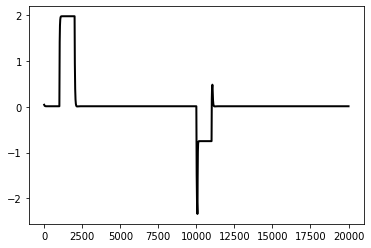

exc_ext =  0.3888888888888889
inh_ext =  0.0


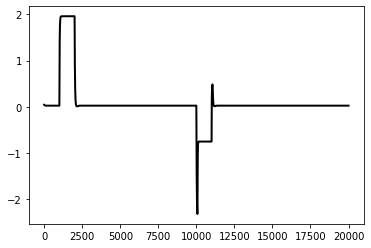

exc_ext =  0.7777777777777778
inh_ext =  0.0


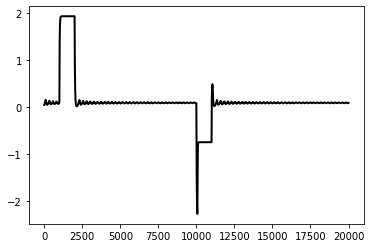

exc_ext =  1.1666666666666667
inh_ext =  0.0


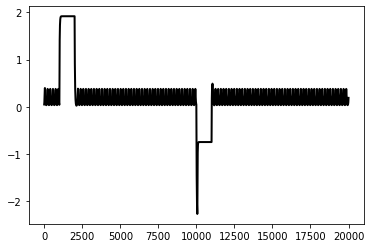

exc_ext =  1.5555555555555556
inh_ext =  0.0


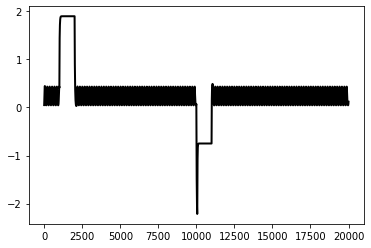

exc_ext =  1.9444444444444444
inh_ext =  0.0


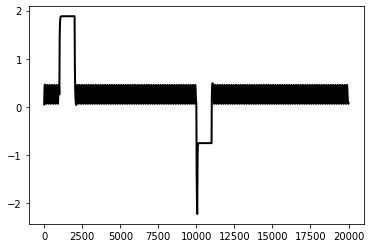

exc_ext =  2.3333333333333335
inh_ext =  0.0


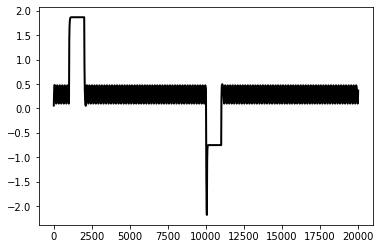

exc_ext =  2.7222222222222223
inh_ext =  0.0


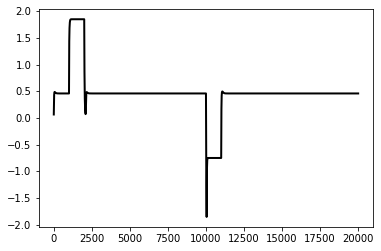

exc_ext =  3.111111111111111
inh_ext =  0.0


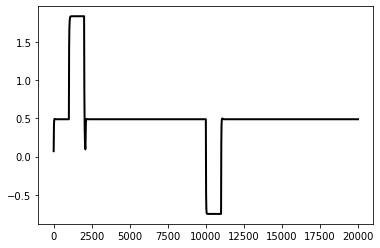

exc_ext =  3.5
inh_ext =  0.0


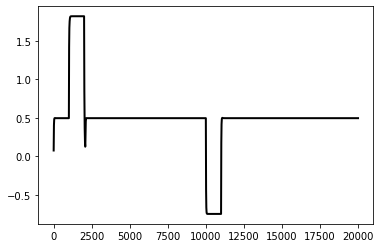

exc_ext =  0.0
inh_ext =  0.3888888888888889


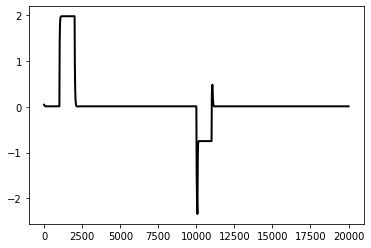

exc_ext =  0.3888888888888889
inh_ext =  0.3888888888888889


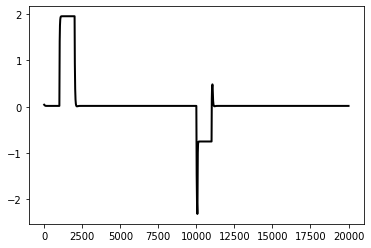

exc_ext =  0.7777777777777778
inh_ext =  0.3888888888888889


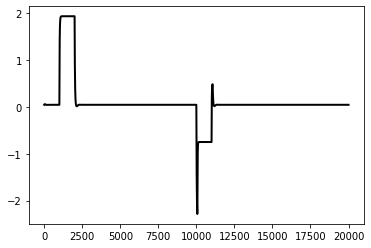

exc_ext =  1.1666666666666667
inh_ext =  0.3888888888888889


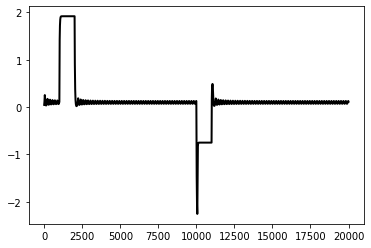

exc_ext =  1.5555555555555556
inh_ext =  0.3888888888888889


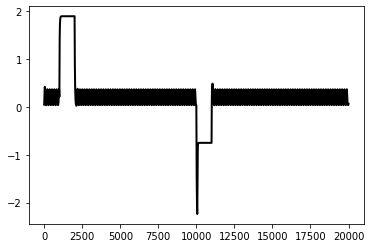

exc_ext =  1.9444444444444444
inh_ext =  0.3888888888888889


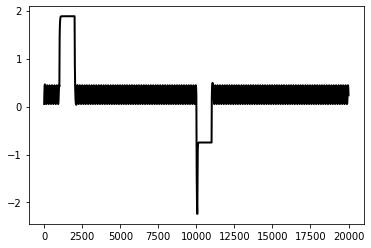

exc_ext =  2.3333333333333335
inh_ext =  0.3888888888888889


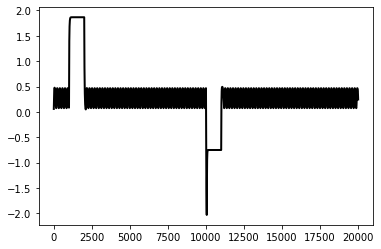

exc_ext =  2.7222222222222223
inh_ext =  0.3888888888888889


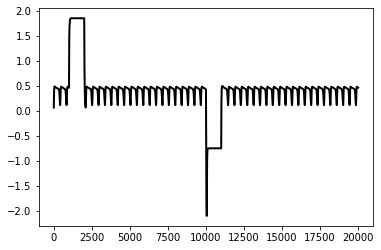

exc_ext =  3.111111111111111
inh_ext =  0.3888888888888889


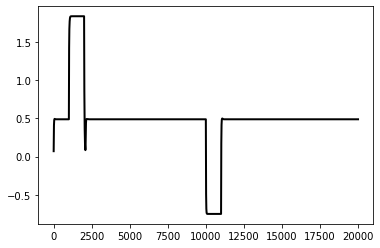

exc_ext =  3.5
inh_ext =  0.3888888888888889


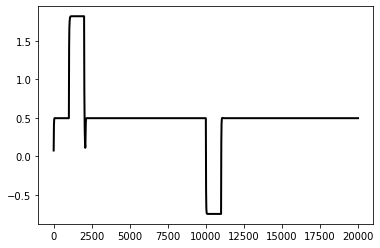

exc_ext =  0.0
inh_ext =  0.7777777777777778


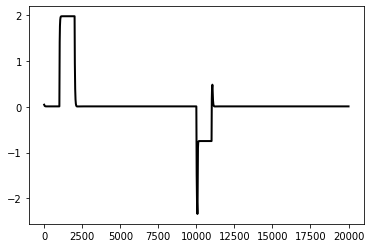

exc_ext =  0.3888888888888889
inh_ext =  0.7777777777777778


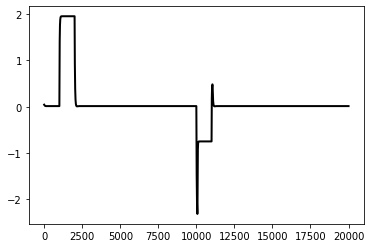

exc_ext =  0.7777777777777778
inh_ext =  0.7777777777777778


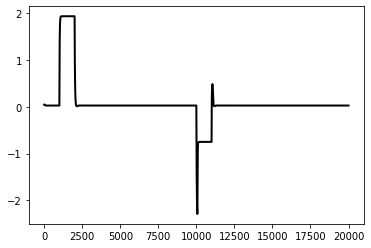

exc_ext =  1.1666666666666667
inh_ext =  0.7777777777777778


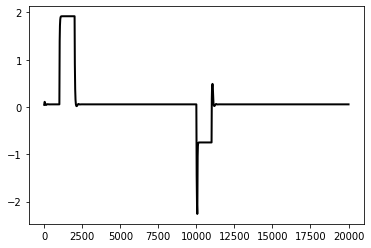

exc_ext =  1.5555555555555556
inh_ext =  0.7777777777777778


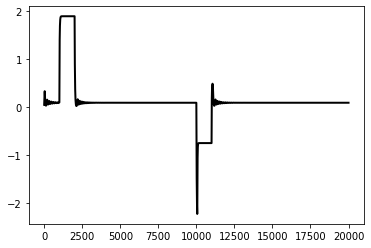

exc_ext =  1.9444444444444444
inh_ext =  0.7777777777777778


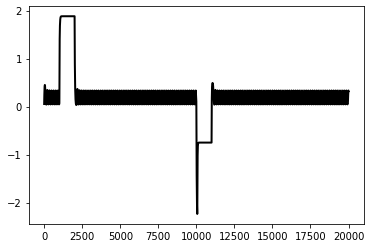

exc_ext =  2.3333333333333335
inh_ext =  0.7777777777777778


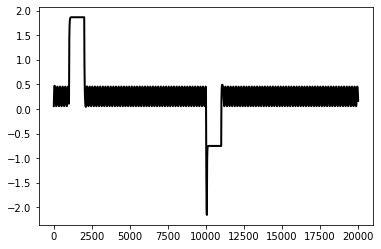

exc_ext =  2.7222222222222223
inh_ext =  0.7777777777777778


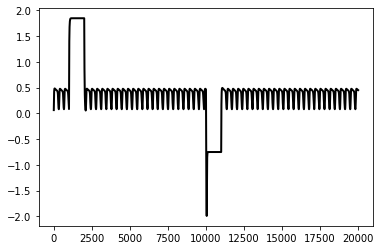

exc_ext =  3.111111111111111
inh_ext =  0.7777777777777778


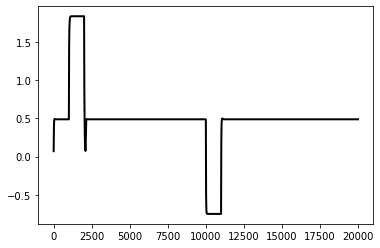

exc_ext =  3.5
inh_ext =  0.7777777777777778


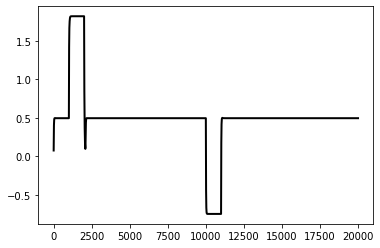

exc_ext =  0.0
inh_ext =  1.1666666666666667


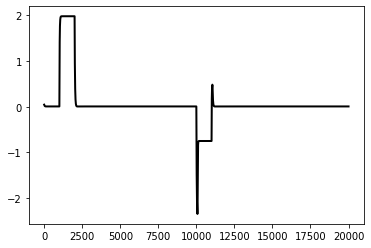

exc_ext =  0.3888888888888889
inh_ext =  1.1666666666666667


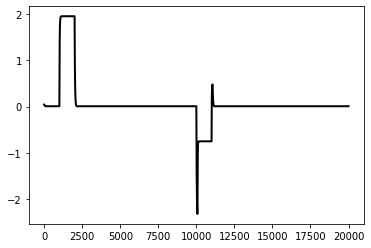

exc_ext =  0.7777777777777778
inh_ext =  1.1666666666666667


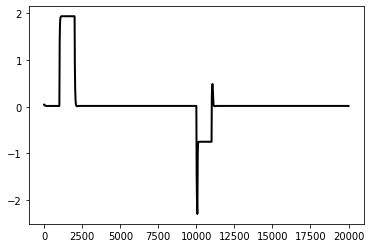

exc_ext =  1.1666666666666667
inh_ext =  1.1666666666666667


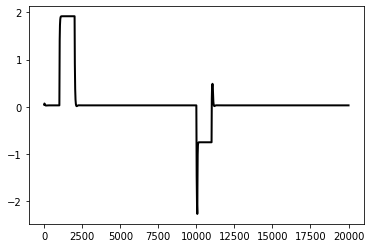

exc_ext =  1.5555555555555556
inh_ext =  1.1666666666666667


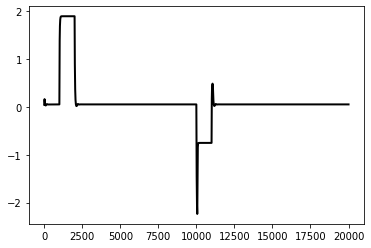

exc_ext =  1.9444444444444444
inh_ext =  1.1666666666666667


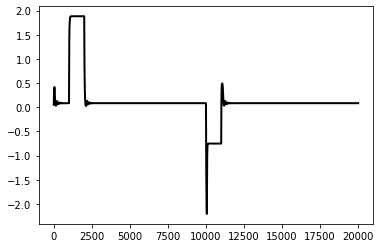

exc_ext =  2.3333333333333335
inh_ext =  1.1666666666666667


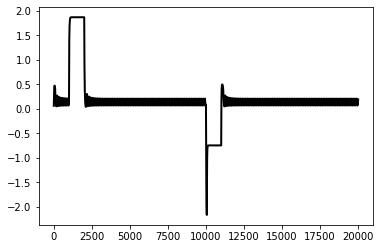

exc_ext =  2.7222222222222223
inh_ext =  1.1666666666666667


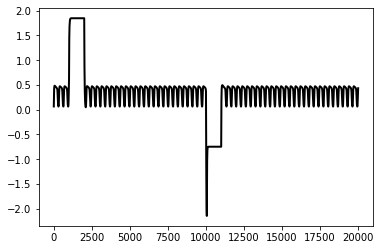

exc_ext =  3.111111111111111
inh_ext =  1.1666666666666667


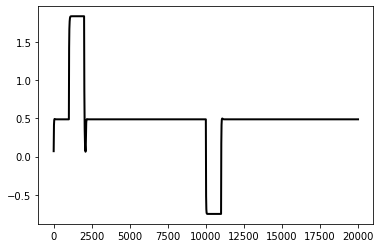

exc_ext =  3.5
inh_ext =  1.1666666666666667


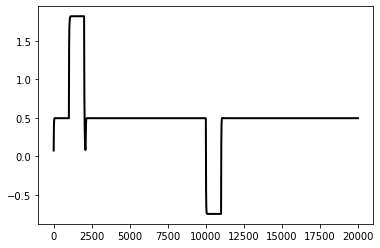

exc_ext =  0.0
inh_ext =  1.5555555555555556


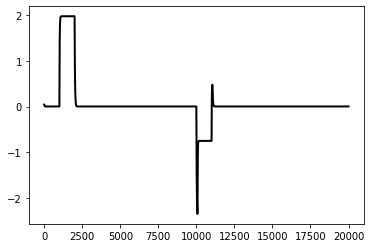

exc_ext =  0.3888888888888889
inh_ext =  1.5555555555555556


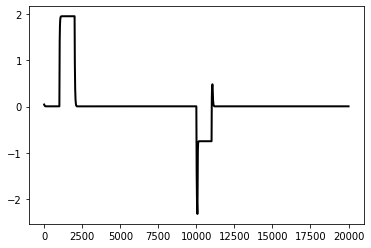

exc_ext =  0.7777777777777778
inh_ext =  1.5555555555555556


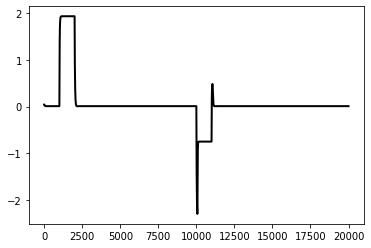

exc_ext =  1.1666666666666667
inh_ext =  1.5555555555555556


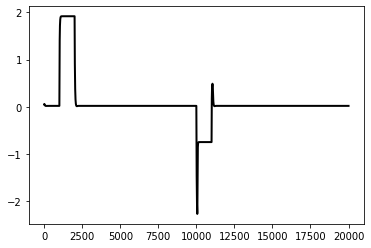

exc_ext =  1.5555555555555556
inh_ext =  1.5555555555555556


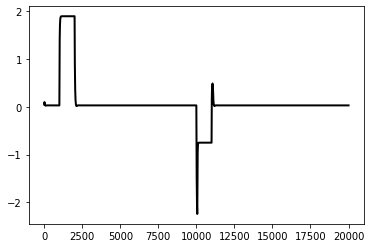

exc_ext =  1.9444444444444444
inh_ext =  1.5555555555555556


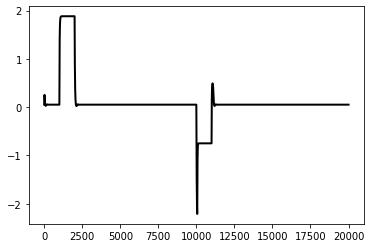

exc_ext =  2.3333333333333335
inh_ext =  1.5555555555555556


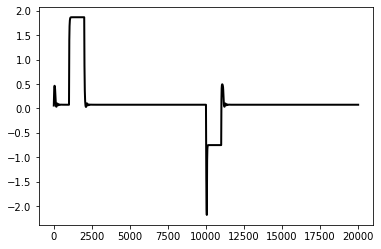

exc_ext =  2.7222222222222223
inh_ext =  1.5555555555555556


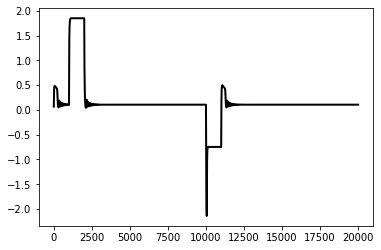

exc_ext =  3.111111111111111
inh_ext =  1.5555555555555556


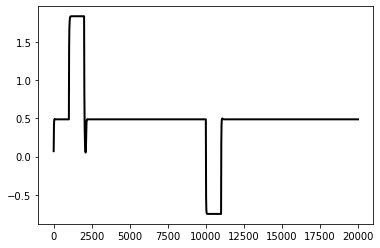

exc_ext =  3.5
inh_ext =  1.5555555555555556


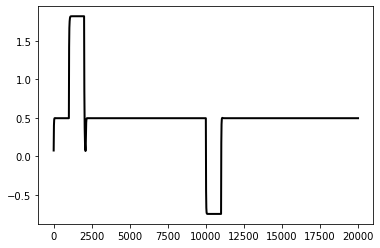

exc_ext =  0.0
inh_ext =  1.9444444444444444


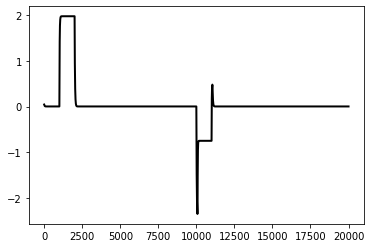

exc_ext =  0.3888888888888889
inh_ext =  1.9444444444444444


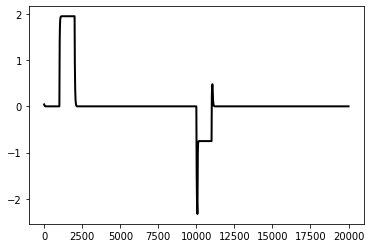

exc_ext =  0.7777777777777778
inh_ext =  1.9444444444444444


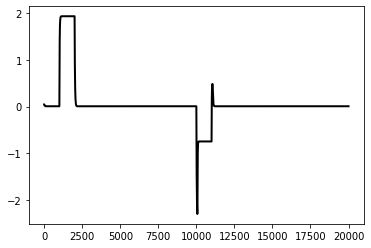

exc_ext =  1.1666666666666667
inh_ext =  1.9444444444444444


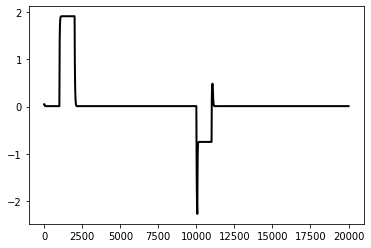

exc_ext =  1.5555555555555556
inh_ext =  1.9444444444444444


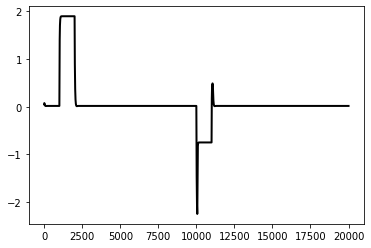

exc_ext =  1.9444444444444444
inh_ext =  1.9444444444444444


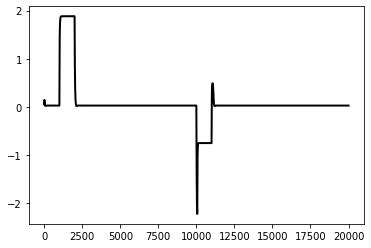

exc_ext =  2.3333333333333335
inh_ext =  1.9444444444444444


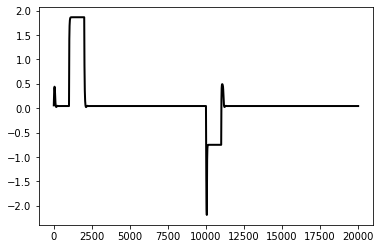

exc_ext =  2.7222222222222223
inh_ext =  1.9444444444444444


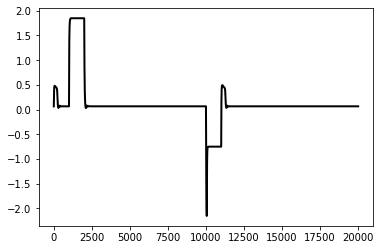

exc_ext =  3.111111111111111
inh_ext =  1.9444444444444444


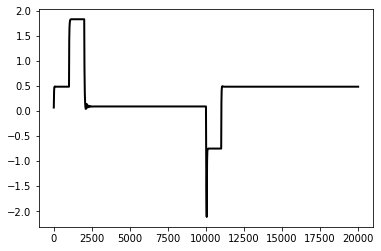

exc_ext =  3.5
inh_ext =  1.9444444444444444


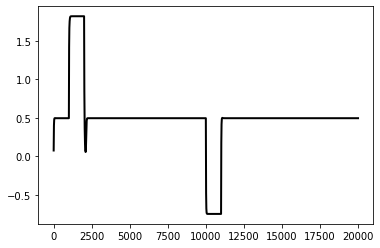

exc_ext =  0.0
inh_ext =  2.3333333333333335


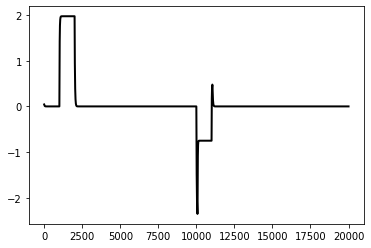

exc_ext =  0.3888888888888889
inh_ext =  2.3333333333333335


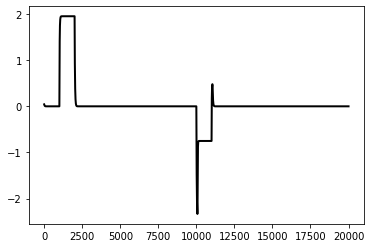

exc_ext =  0.7777777777777778
inh_ext =  2.3333333333333335


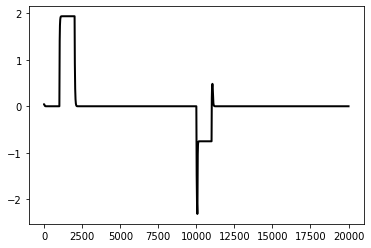

exc_ext =  1.1666666666666667
inh_ext =  2.3333333333333335


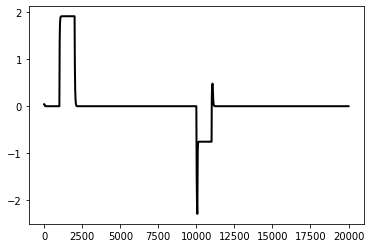

exc_ext =  1.5555555555555556
inh_ext =  2.3333333333333335


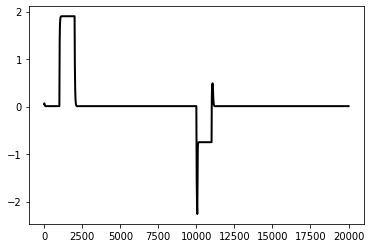

exc_ext =  1.9444444444444444
inh_ext =  2.3333333333333335


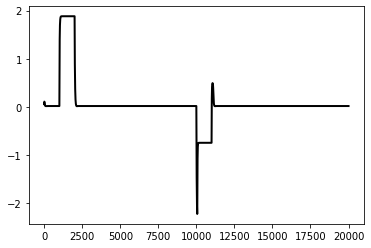

exc_ext =  2.3333333333333335
inh_ext =  2.3333333333333335


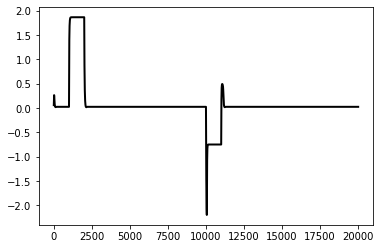

exc_ext =  2.7222222222222223
inh_ext =  2.3333333333333335


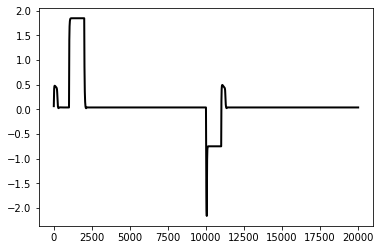

exc_ext =  3.111111111111111
inh_ext =  2.3333333333333335


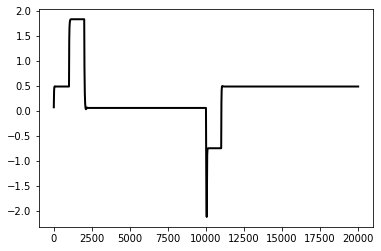

exc_ext =  3.5
inh_ext =  2.3333333333333335


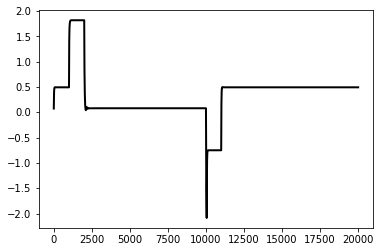

exc_ext =  0.0
inh_ext =  2.7222222222222223


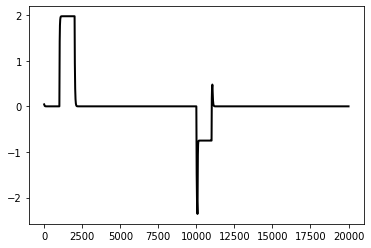

exc_ext =  0.3888888888888889
inh_ext =  2.7222222222222223


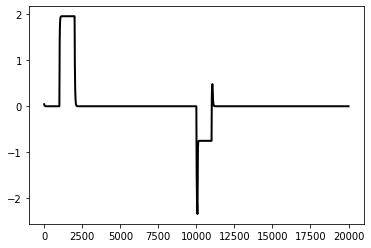

exc_ext =  0.7777777777777778
inh_ext =  2.7222222222222223


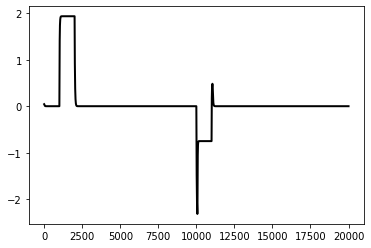

exc_ext =  1.1666666666666667
inh_ext =  2.7222222222222223


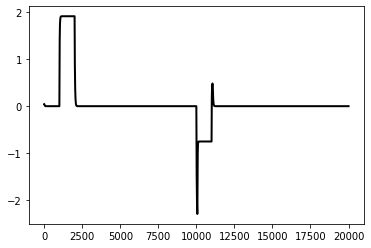

exc_ext =  1.5555555555555556
inh_ext =  2.7222222222222223


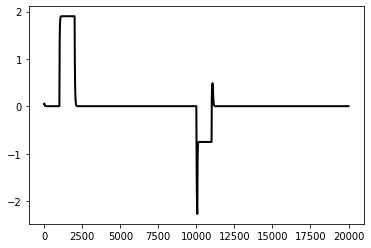

exc_ext =  1.9444444444444444
inh_ext =  2.7222222222222223


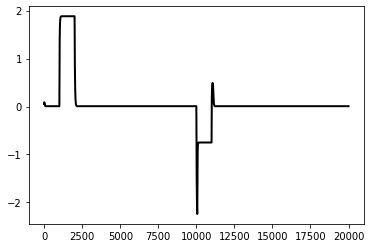

exc_ext =  2.3333333333333335
inh_ext =  2.7222222222222223


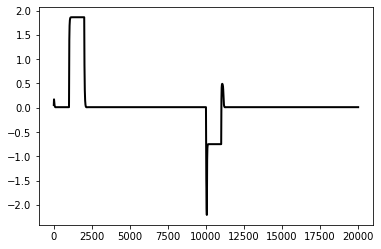

exc_ext =  2.7222222222222223
inh_ext =  2.7222222222222223


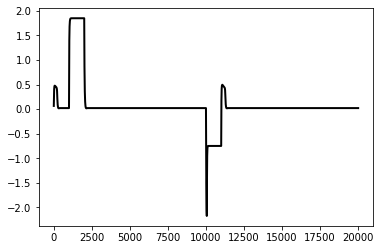

exc_ext =  3.111111111111111
inh_ext =  2.7222222222222223


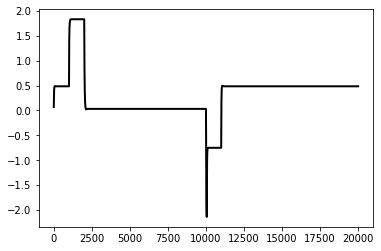

exc_ext =  3.5
inh_ext =  2.7222222222222223


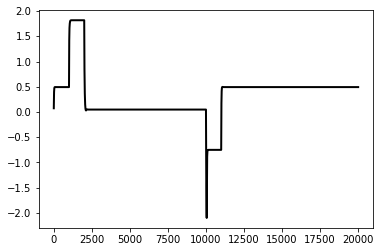

exc_ext =  0.0
inh_ext =  3.111111111111111


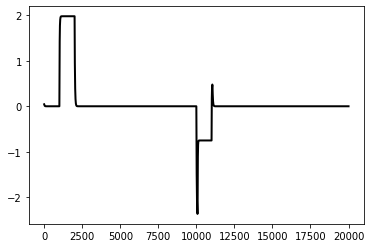

exc_ext =  0.3888888888888889
inh_ext =  3.111111111111111


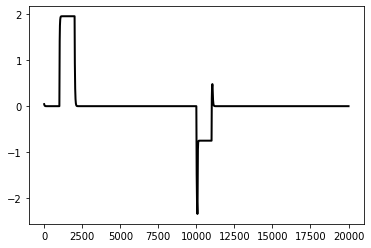

exc_ext =  0.7777777777777778
inh_ext =  3.111111111111111


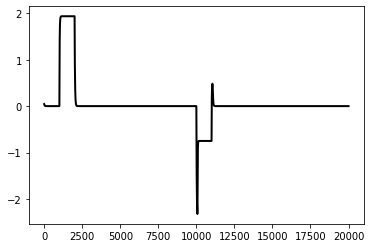

exc_ext =  1.1666666666666667
inh_ext =  3.111111111111111


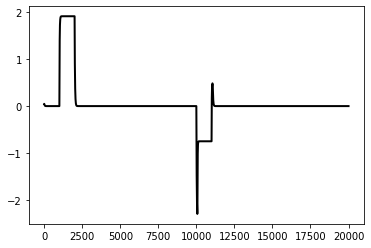

exc_ext =  1.5555555555555556
inh_ext =  3.111111111111111


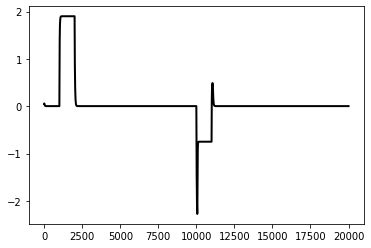

exc_ext =  1.9444444444444444
inh_ext =  3.111111111111111


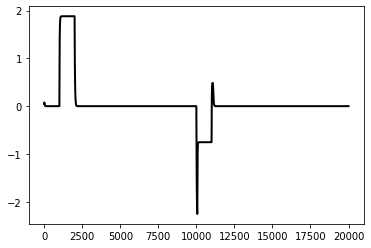

exc_ext =  2.3333333333333335
inh_ext =  3.111111111111111


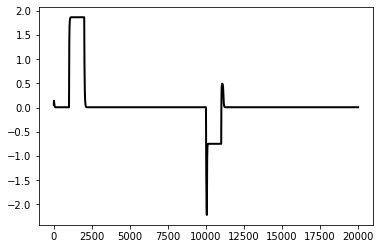

exc_ext =  2.7222222222222223
inh_ext =  3.111111111111111


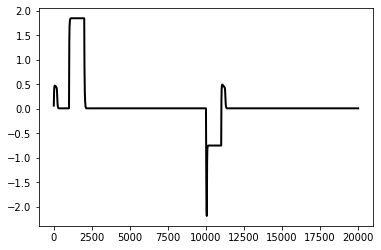

exc_ext =  3.111111111111111
inh_ext =  3.111111111111111


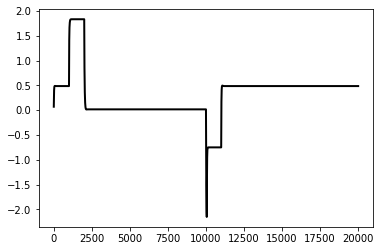

exc_ext =  3.5
inh_ext =  3.111111111111111


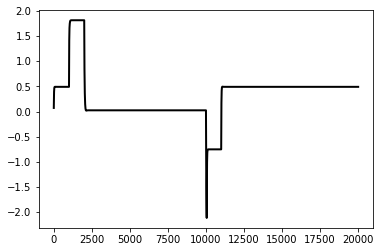

exc_ext =  0.0
inh_ext =  3.5


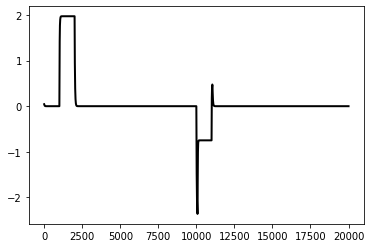

exc_ext =  0.3888888888888889
inh_ext =  3.5


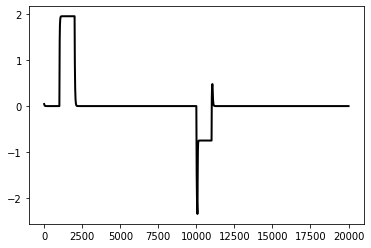

exc_ext =  0.7777777777777778
inh_ext =  3.5


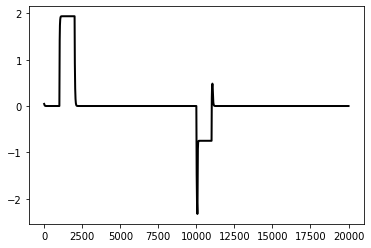

exc_ext =  1.1666666666666667
inh_ext =  3.5


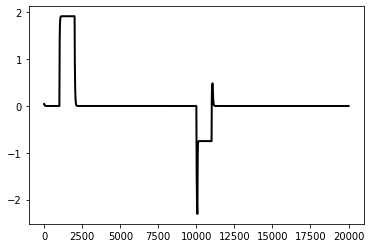

exc_ext =  1.5555555555555556
inh_ext =  3.5


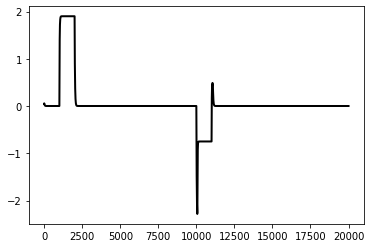

exc_ext =  1.9444444444444444
inh_ext =  3.5


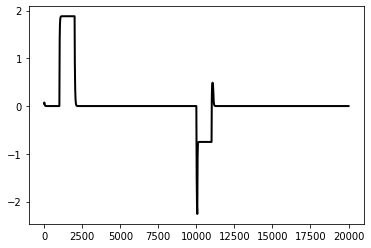

exc_ext =  2.3333333333333335
inh_ext =  3.5


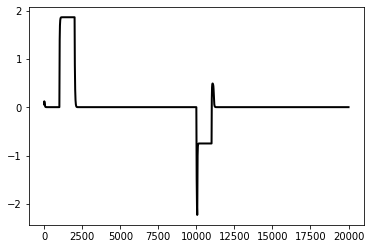

exc_ext =  2.7222222222222223
inh_ext =  3.5


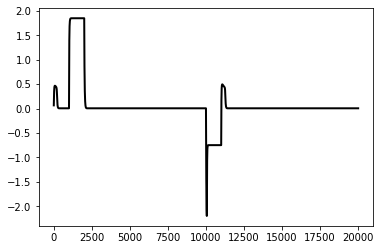

exc_ext =  3.111111111111111
inh_ext =  3.5


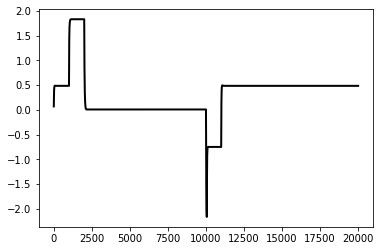

exc_ext =  3.5
inh_ext =  3.5


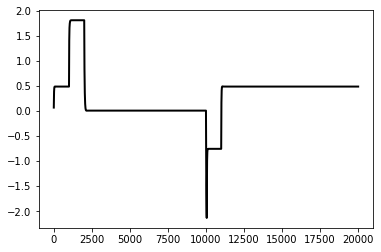

In [124]:
wc = WCModel()
wc.params['duration'] = 2.0*1000
exc_inputs_n = 10
inh_inputs_n = 10
exc_inputs = np.linspace(0, 3.5, exc_inputs_n)
inh_inputs = np.linspace(0, 3.5, inh_inputs_n)
#fig,a =  plt.subplots(10,25,  sharex='col', sharey='row', figsize=(15,10))
for i, inh_ext in enumerate(inh_inputs):
    for j, exc_ext in enumerate(exc_inputs):
        # Note: this has to be a vector since it is input for all nodes
        # (but we have only one node in this example)
        wc.params['exc_ext'] = exc_ext
        wc.params['inh_ext'] = inh_ext
        #wc.params['duration'] = 2.0*1000
        #wc.params['exc_ext'] = 2.9
        #wc.params['inh_ext'] = 2.5
        wc.params["control_term_E"] = stimulus
        wc.params["control_term_I"] = stimulus
        #print(wc.params["control_term_E"])
        #print(stimulus)
        wc.run()
        print("exc_ext = ", exc_ext)
        print("inh_ext = ", inh_ext)
        plt.plot(range(int(wc.params['duration']/wc.params['dt'])), wc.exc[0].tolist(), c='k', lw = 2)
        plt.show()

In [5]:
def optimal_control(wс, exc_exp, inh_exp, debug = False):
    
    #h = (xn-x0)/n_step
    #times = np.arange(0, xn+h, h)
    times = range(int(wc.params['duration']/wc.params['dt']))
    #print(times)
    u_i = stim.StepInput(step_size=0,  start=0.1, end=0.2, n=1).to_model(wc)
    #print("u_i", u_i)
    u_e = stim.StepInput(step_size=0,  start=0.1, end=0.2, n=1).to_model(wc)
    #u_i = stimulus
    #u_e = stimulus
    print("u_e", u_e)
    for l in range(2000):

        wc.params["control_term_E"] = u_e
        wc.params["control_term_I"] = u_i

        
        wc.run()
        #print("check", wc.brackets_E)
        ex = wc.exc
        inh = wc.inh
        
        if(debug):
            print(np.shape(ex))
            print(int(wc.params['duration']/wc.params['dt']))
        if (l%200==0):
            plt.figure(figsize = (20, 6))
            plt.plot(wc.t, exc_exp.T,c = 'blue',label="exc_target")
            plt.plot(wc.t, ex[0].tolist(), c='k', lw = 2, label="exc")
            plt.plot(wc.t, u_e.T, c='r', lw = 2,label="stimulus")
            plt.legend()
            plt.show()
        
        
        lambdas = euler_backwards(wc, exc_exp, inh_exp, wc.params['dt'], int(math.ceil(wc.params['duration']/wc.params['dt'])), debug)
        if debug:
            print("lambdas", lambdas)
            plt.figure(figsize = (20, 6))
            plt.plot(wc.t, [x[0] for x in lambdas], c='blue', lw = 2, label="lambdas")
            plt.legend()
            plt.show()
        
        w = [0,0]
        
        grad = grad_f(w, u_e,u_i, lambdas, times)
        if debug:
            print("grad", grad)

            plt.figure(figsize = (20, 6))
            plt.plot(wc.t, np.array(grad[0]), c='red', lw = 2, label="grad")
            plt.legend()
            plt.show()
        
        step_size_adj = 10 #0.005
        
        
        step_size_adj = bisection(wc, step_size_adj,u_e,u_i,grad, times, exc_exp, debug)
        #if(l == 0):
        #    step_size_adj = 0.1
            
        if debug:
            print("step", step_size_adj)
            print("step_new", step_size_adj*np.array(grad[0]))

        u_e = u_e-step_size_adj*np.array(grad[0])
        u_i = u_i-step_size_adj*np.array(grad[1])

            
            

In [94]:
def bisection(model, step_size, u_e, u_i, grad, times, exc_exp, debug = False):
    cost_temp = 10**12
    while step_size > 0.000001:
        u_e_1 = u_e-step_size*np.array(grad[0])
        u_i_1 = u_i-step_size*np.array(grad[1])

        model.params["control_term_E"] = u_e_1
        model.params["control_term_I"] = u_i_1


        wc.run()
        ex = model.exc
        inh = model.inh
        
        if debug:
            plt.figure(figsize = (8, 5))
            plt.plot(model.t, exc_exp.T,c = 'blue', label="exc_target")
            plt.plot(model.t, ex[0].tolist(), c='k', lw = 2, label="exc")
            plt.plot(model.t, u_e_1.T, c='r', lw = 2, label="stimulus")
            plt.legend()
            plt.show()

        cost = cost_f(ex[0], exc_exp, u_e_1, u_i_1, times)
        if debug:
            print("cost", cost)
            print("step_size", step_size)
        #step_size = step_size/2
        #cost_temp = cost
        if(cost<cost_temp):
            step_size = step_size/2
            cost_temp = cost
        else:
            return step_size
        
    return 0
        

def cost_f(x, x_, u_exc, u_inh, times):

    #return np.sum(1/2*(x_-x)**2) 
    return scipy.integrate.simps(1/2*(x_-x)**2,times) \
            #+ 0.3 * ((np.sqrt(scipy.integrate.simps(u_exc**2, times))) \
            # + np.sqrt(scipy.integrate.simps(u_inh**2, times)))
    #return  0.3 * (np.sqrt(scipy.integrate.simps(u_exc**2, times)) \
    #        + np.sqrt(scipy.integrate.simps(u_inh**2, times)) \
    #        + 0.5 * scipy.integrate.simps(u_exc**2 + u_inh**2, times)) \
    #        + scipy.integrate.simps((x-x_)**2,times)

In [112]:
def S_E(x, model):
    a_exc = model.params["a_exc"]
    mu_exc = model.params["mu_exc"]
    #return 1.0 / (1.0 + np.exp(-a_exc * (x - mu_exc)))
    return 1/(x+1)

def S_I(x, model):
    a_inh = model.params["a_inh"]
    mu_inh = model.params["mu_inh"]
    return 1/(x+1)
    #return 1.0 / (1.0 + np.exp(-a_inh * (x - mu_inh)))

def dh1_dE(model, i):
    a_exc = model.params["a_exc"]
    C_EE = model.params["c_excexc"]
    mu_exc = model.params["mu_exc"]
    brackets_E = model.brackets_E[0][i]

    E_j = model.exc[0][i]

    #return -1-S_E(brackets_E, model)+(a_exc*np.exp(-a_exc * ( brackets_E - mu_exc)))/(S_E(brackets_E, model)**2)*C_EE*(1-E_j)
    return -1-S_E(brackets_E, model)+(-1/(1 + brackets_E)**2)*C_EE*(1-E_j)
    #return -1

def dh2_dI(model, i):
    a_inh = model.params["a_inh"]
    mu_inh = model.params["mu_inh"]
    C_II = model.params["c_inhinh"]
    brackets_I = model.brackets_I[0][i]
    I_j = model.inh[0][i]
    return -1-S_I(brackets_I, model)+(-1/(1 + brackets_I)**2)*(-C_II)*(1-I_j)
    #return -1-S_I(brackets_I, model)+(a_inh*np.exp(-a_inh * (brackets_I - mu_inh)))/(S_I(brackets_I, model)**2)*(-C_II)*(1-I_j)
    #return -1
def dh1_dI(model, i):
    a_exc = model.params["a_exc"]
    C_IE = model.params["c_inhexc"]
    mu_exc = model.params["mu_exc"]
    brackets_E = model.brackets_E[0][i]
    E_j = model.exc[0][i]
    #return 0 
    return (1-E_j)*(-1/(1 + brackets_E)**2)*(-C_IE)
    #return (1-E_j)*(a_exc*np.exp(-a_exc * (brackets_E - mu_exc)))/(S_E(brackets_E, model)**2)*(-C_IE)

def dh2_dE(model, i):
    a_inh = model.params["a_inh"]
    mu_inh = model.params["mu_inh"]
    C_EI = model.params["c_excinh"]
    brackets_I = model.brackets_I[0][i]
    I_j = model.inh[0][i]
    #return 0 
    #return (1-I_j)*(a_inh*np.exp(-a_inh * (brackets_I - mu_inh)))/(S_I(brackets_I, model)**2)*C_EI
    return (1-I_j)*(-1/(1 + brackets_I)**2)*C_EI

    
def lambda_der(model, lambdas, ex_exp, inh_exp, i, debug = False):
    
    tauE = model.params["tau_exc"]
    tauI = model.params["tau_inh"]
    
    Dx_doth = np.array([[ -1*tauE, 0], 
                  [0, -1*tauI]])
    
    Dxf = np.array([model.exc[0][i]-ex_exp[i], model.inh[0][i]-inh_exp[i]])
    
    Dxh = np.array([[ dh1_dE(model,i), dh1_dI(model, i)], 
                  [dh2_dE(model, i), dh2_dI(model, i)]])
    if debug:
        print("a", model.exc[0][i])
        print("b", ex_exp[i])
        print("Dxh", Dxh)
        print("Dxf", Dxf)
        print("lambdas[i]@Dxh",lambdas[i]@Dxh)
        print("Dxf + lambdas[i]@Dxh", Dxf + lambdas[i]@Dxh)
        print((Dxf + lambdas[i]@Dxh)@np.linalg.inv(Dx_doth))
        print("__________________________________")
    
    return (Dxf + lambdas[i]@Dxh)@np.linalg.inv(Dx_doth)

def euler_backwards(model, ex_exp, inh_exp, step, n, debug = False):
     
    lambdas = [[0,0] for i in range(n)]
    
    #inh = wc.inh[0]
    #ex = wc.exc[0]
    if debug:
        print("exc", model.exc[0])
        print("exc_exp", ex_exp)
    
    for i in range(n-2,-1,-1):
        lambdas[i] = lambdas[i+1]-step*lambda_der(model, lambdas, ex_exp, inh_exp, i, debug) #i+1 or i
        #print("lambdas", lambdas[i])

    return lambdas

def grad_f(w, u_e, u_i, lambdas, times): ##TODO add cost components
    lambda_list = [[x[0] for x in lambdas],[x[1] for x in lambdas]]
    f_list = [np.abs(w[0]*u_e[0]).tolist(), np.abs(w[1]*u_i[0]).tolist()]
    summed = [[x + y for (x, y) in zip(f_list[0], lambda_list[0])],[x + y for (x, y) in zip(f_list[1], lambda_list[1])]]
    return summed
    #return summed
    #return [[x[0] for x in lambdas],[x[1] for x in lambdas]] + [0.3*np.abs(u_e).tolist(), 0.3*np.abs(u_i).tolist()] 
            #+ [(1/np.sqrt(scipy.integrate.simps(u_e**2, times)))*u_e, (1/np.sqrt(scipy.integrate.simps(u_i**2, times)))*u_i]
    

# Toy example

In [113]:
from neurolib.models.wc import WCModel
wc = WCModel()
#wc.params["c_inhinh"] = 0
#wc.params["c_excinh"] = 0
#wc.params["c_inhexc"] = 0
#wc.params["c_excexc"] = 0
#wc.params["tau_exc"] = 1  
#wc.params["tau_inh"] = 1
#wc.params["exc_ext"] = 0
#wc.params["inh_ext"] = 0
#wc.params["K_gl"] = 0
#wc.params["dt"] = 0.1
wc.params['duration'] = 10


[[0.31998907 0.56345852 0.75314068 0.90711792 1.03535224 1.14395464
  1.23700798 1.31741346 1.38732831 1.44841272 1.50197895 1.54908644
  1.59060521 1.62725977 1.65966044 1.68832628 1.71370232 1.73617273
  1.75607109 1.77368843 1.7892798  1.80306948 1.81525534 1.82601242
  1.83549589 1.84384362 1.85117829 1.85760924 1.86323403 1.86813982
  1.87240452 1.87609787 1.87928226 1.88201359 1.88434187 1.88631186
  1.88796359 1.8893329  1.89045203 1.89135024 1.89205442 1.89258929
  1.89297654 1.89323256 1.89336587 1.89337964 1.89328869 1.89315187
  1.89306602 1.89296277 2.53225145 3.11690881 3.65978815 4.16834798
  4.64746945 5.10057649 5.53022721 5.93843729 6.32685661 6.69687399
  7.0497061  7.06648798 6.97607626 6.83678296 6.67222824 6.49427605
  6.30968315 6.12261989 5.93580106 5.75106273 5.51150638 5.28389853
  5.06781904 4.86284538 4.66856478 4.48457927 4.31050432 4.14596661
  3.99060256 3.84405733 3.70598398 3.57604284 3.45390072 3.33923042
  3.23171019 3.13102339 3.03685831 2.94890809 2.

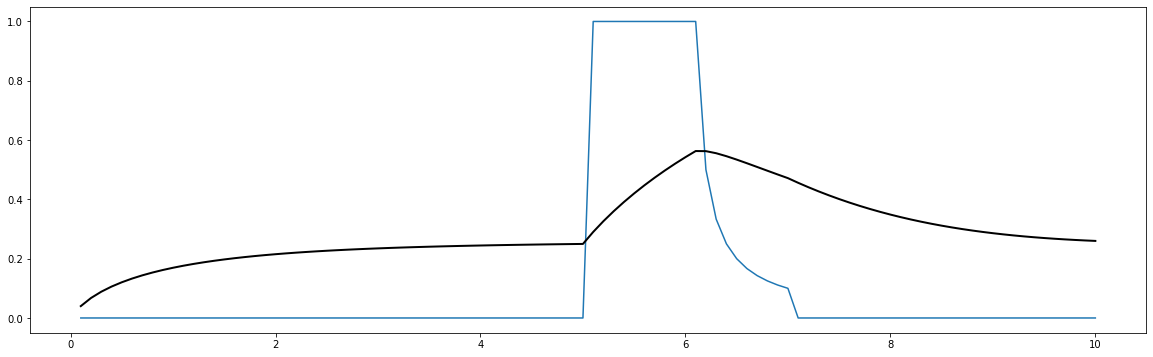

In [116]:
#stimulus
stimulus = np.zeros((1,100))

#stimulus[0,6] = 1
#stimulus[0,7] = 1
stimulus[0,50:60] = 1

stimulus[0,50:60] = 1
for i in range(10):
    stimulus[0,60+i]=1/(i+1)
#stimulus[0,9] = 1

#stimulus[10000:11000] = -5

wc.params["control_term_E"] = stimulus
#wc.params["control_term_I"] = stimulus
wc.params['exc_init'] = np.zeros((1,100))
wc.params['inh_init'] = np.zeros((1,100))
wc.run()

print(wc.brackets_E)

plt.figure(figsize = (20, 6))
plt.plot(wc.t, stimulus.T)
plt.plot(wc.t, wc.exc[0].tolist(), c='k', lw = 2)


u_e [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


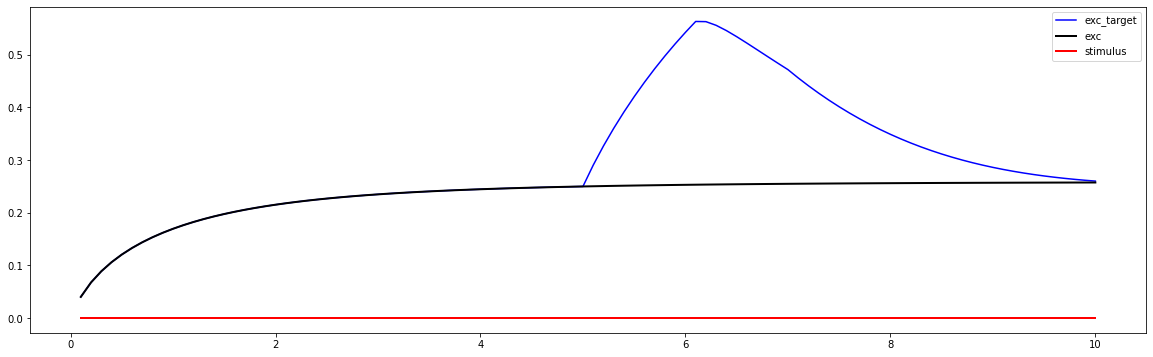

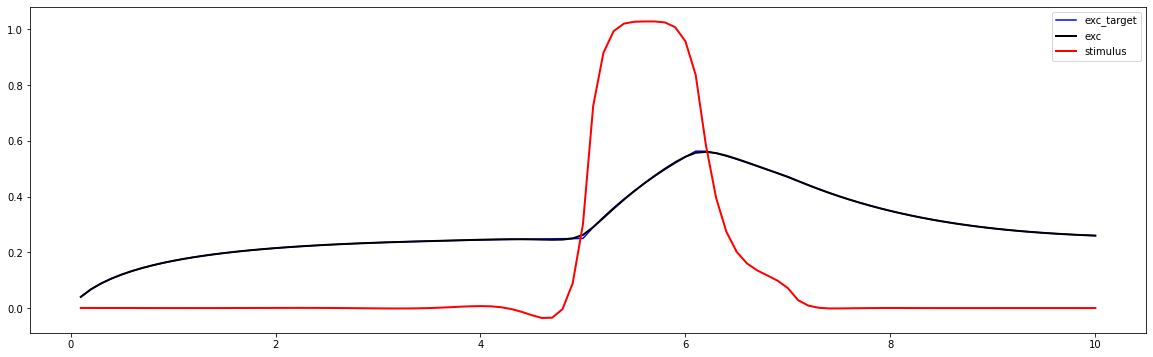

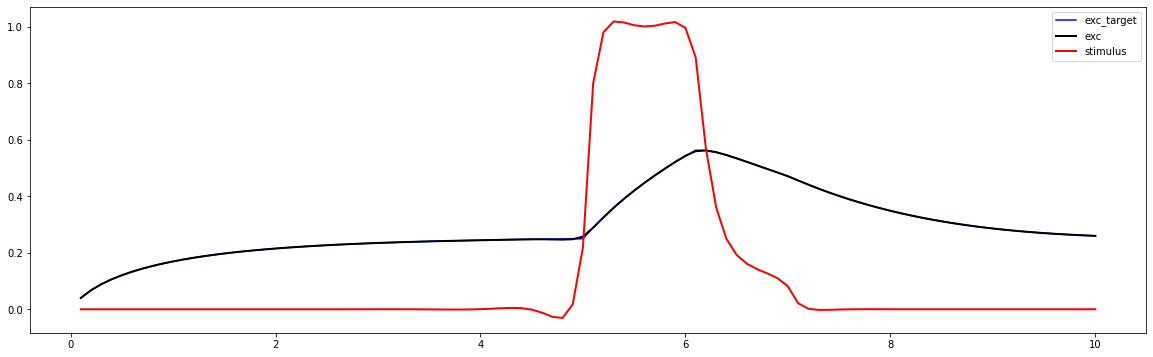

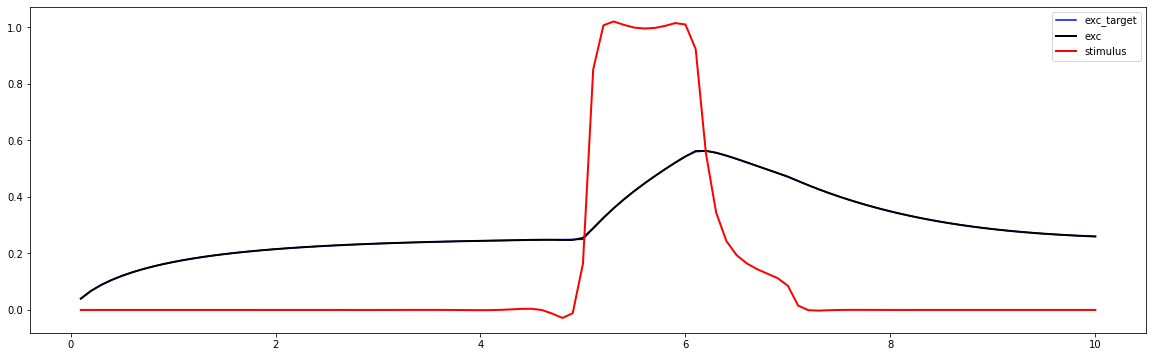

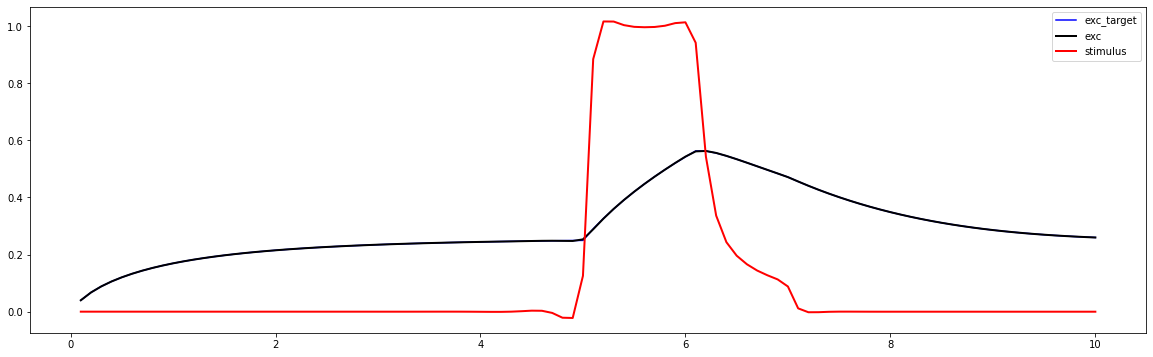

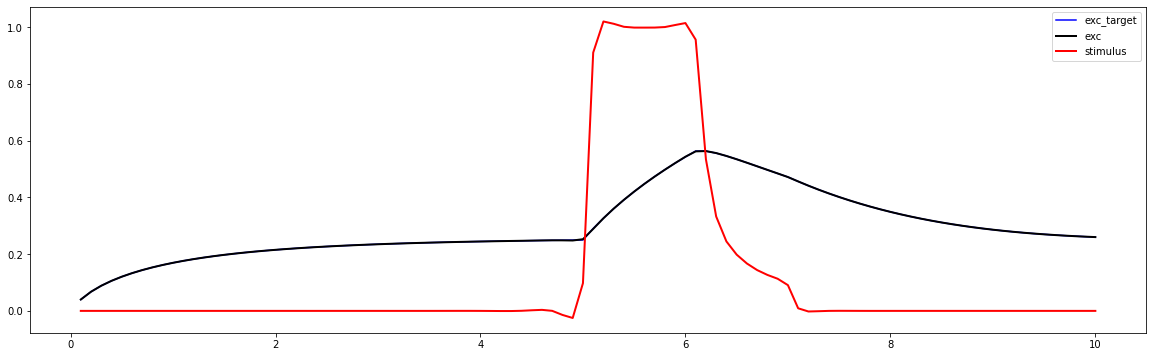

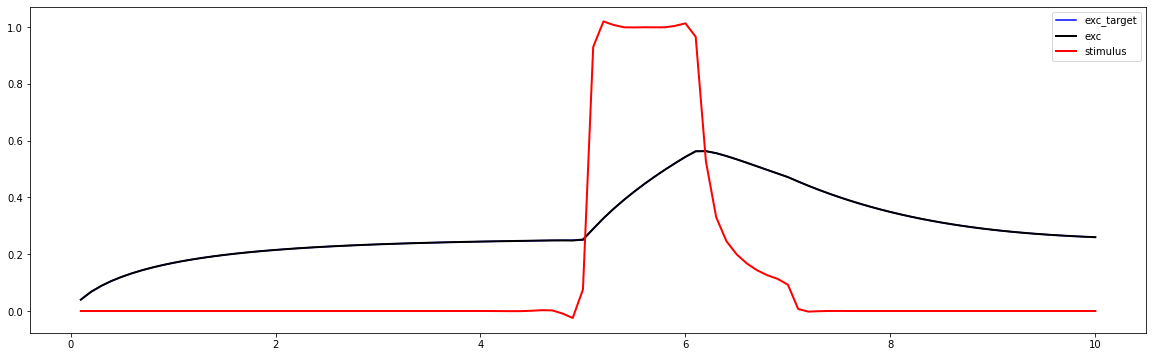

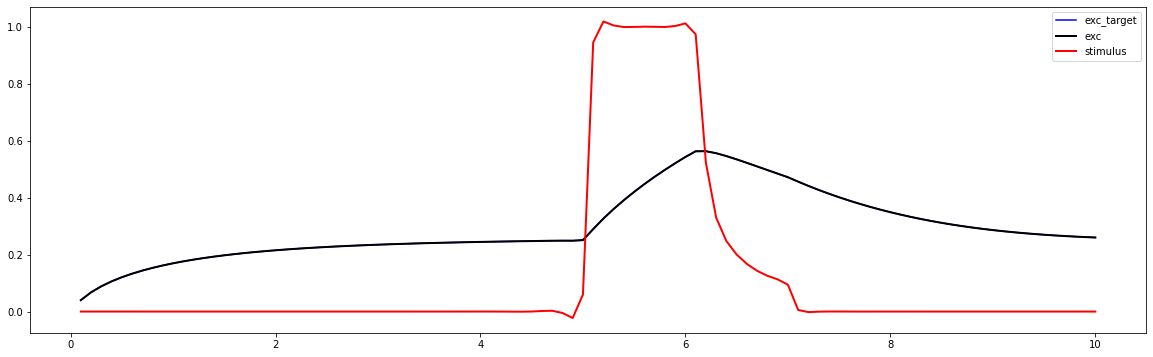

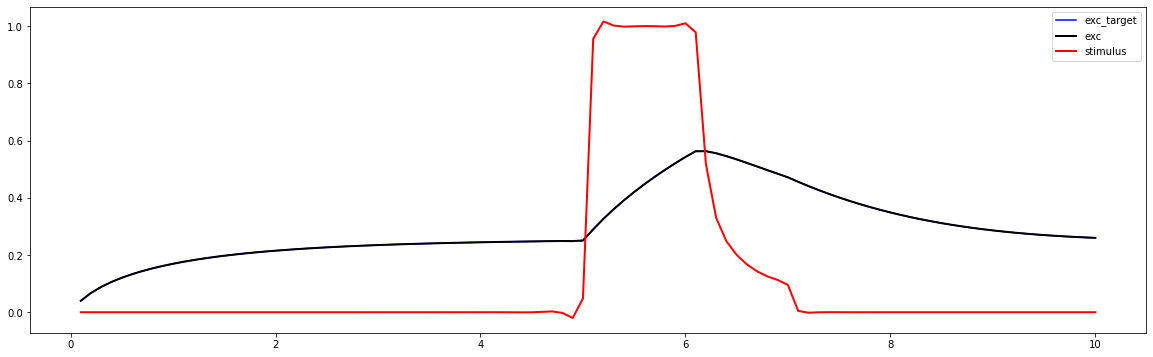

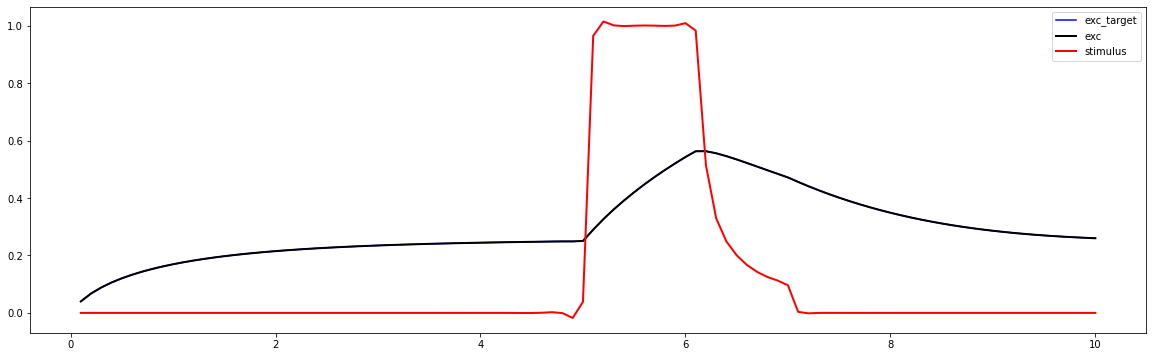

In [115]:
#wc = WCModel()
#wc.params["control_term"] = s
#wc.params['exc_ext'] = 3.5
#wc.params['inh_ext'] = 3.5
exc=wc.exc[0]
inh = wc.inh[0]

optimal_control(wc, exc,inh, debug = False)
#optimal_control(wc, stimulus, target, target)

In [34]:
wc.params["control_term"] = stimulus

In [46]:
#wc = WCModel()
#wc.params["control_term"] = s
#wc.params['exc_ext'] = 3.5
#wc.params['inh_ext'] = 3.5
optimal_control(wc, stimulus, wc.exc[0], wc.inh[0], debug = False)
#optimal_control(wc, stimulus, target, target)

TypeError: optimal_control() got multiple values for argument 'debug'

In [ ]:
#target signal


wc = WCModel()
#wc.params["control_term"] = s
wc.params['exc_ext'] = 0
wc.params['inh_ext'] = 0
wc.run()
plt.plot(range(int(wc.params['duration']/wc.params['dt'])), wc.exc[0].tolist(), c='k', lw = 2)
plt.plot(wc.params["control_term_E"].T)
plt.show()
target_exc = wc.exc


#target = stim.SinusoidalInput(amplitude=0.5, frequency=1).to_model(wc)
#plt.plot(target.T)

#exc_5000 0.013072727462704856
#exc_19999 0.4931700303710192
#inh_5000 0.2985821792704872
#inh_19999 0.49998300736421963


#target
target_exc = np.zeros(20000)
target_exc[1000:19999] = 0.013072727462704856


target_inh = np.zeros(20000)
target_inh[1000:19999] = 0.2985821792704872

## Drafts

In [131]:
wc.params['exc_ext'] = 0
wc.params['inh_ext'] = 0
wc.run()

(1, 20000)


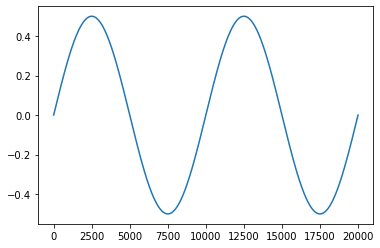

In [156]:
stimulus = stim.SinusoidalInput(amplitude=0.5, frequency=1).to_model(wc)
print(stimulus.shape)
plt.plot(stimulus.T)
wc.params["control_term"] = stimulus

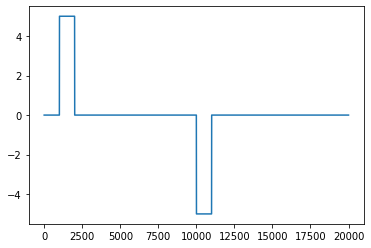

In [196]:
stimulus = np.zeros((20000))
stimulus[1000:2000] = 5
stimulus[10000:11000] = -5
plt.plot(stimulus)

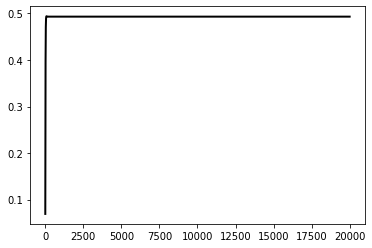

In [182]:
wc = WCModel()
#wc.params["control_term"] = s
wc.params['exc_ext'] = 3.5
wc.params['inh_ext'] = 3.5
wc.run()
plt.plot(range(int(wc.params['duration']/wc.params['dt'])), wc.exc[0].tolist(), c='k', lw = 2)
#plt.plot(s)
plt.show()
target = wc.exc[0]


In [ ]:
plt.plot(exc_inputs, max_exc, c='k', lw = 2)
plt.plot(exc_inputs, min_exc, c='k', lw = 2)
plt.title("Bifurcation diagram of the Wilson-Cowan model")
plt.xlabel("Input to exc")
plt.ylabel("Min / max exc")

In [ ]:
def dh1_dE():
    return 1

def dh2_dE():
    return 2

def dh1_dI():
    return 3

def dh2_dI():
    return 4

def df_dE():
    return 0

def df_dI():
    return 0

lambd1 = 1
lambd2 = 2
Dxh = np.array([[ dh1_dE(), dh1_dI()], 
                  [dh2_dE(), dh2_dI()]])
lambdas = np.array([lambd1, lambd2])

Dxf = np.array([df_dE(), df_dI()])

tauE = 2
tauI = 8

Dx_doth = np.array([[ -tauE, 0], 
                  [0, -tauI]])
x = np.linalg.solve(Dx_doth, b)

(Dxf - lambdas@Dxh)@np.linalg.inv(Dx_doth)



In [ ]:
exp = stim.SinusoidalInput(amplitude=0.5, frequency=0.5).to_model(wc)
#exp = stim.StepInput(step_size=0.5, start=10, end=80, n=2).to_model(wc)
plt.plot(exp.T)

## Single node simulation

In [ ]:
wc = WCModel()
wc.params['duration'] = 1.0*1000
wc.params['sigma_ou'] = 0.01

wc.run()

In [ ]:
plt.plot(wc.t, wc.exc.T, c='k', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity")

## Brain network

In [ ]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [ ]:
wc = WCModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

In [ ]:
wc.params['exc_ext'] = 0.65

wc.params['signalV'] = 0
wc.params['duration'] = 20 * 1000 
wc.params['sigma_ou'] = 0.14
wc.params['K_gl'] = 3.15


wc.run(chunkwise=True)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(func.fc(wc.exc[:, -10000:]))
axs[1].plot(wc.t, wc.exc[::5, :].T, alpha=0.8);
axs[1].set_xlim(0, 200)

In [ ]:
scores = [func.matrix_correlation(func.fc(wc.exc[:, -int(5000/wc.params['dt']):]), fcemp) for fcemp in ds.FCs]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

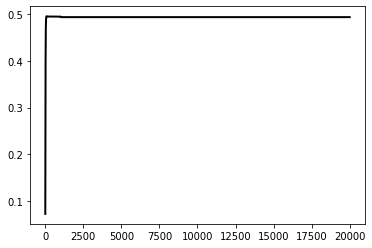

In [18]:
plt.plot(range(int(wc.params['duration']/wc.params['dt'])), ex[0].tolist(), c='k', lw = 2)